# CS 7324-400B: Lab One - Exploring Table Data
#### Fall 2023
#### Author: Davis Vercher (49377022)

##### References & Citations
- **Download Link:**
    - https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
- **Sources:** 
    - Daily weather observations. (n.d.). http://www.bom.gov.au/climate/dwo/
    - Climate Data Online - Map search. (n.d.). http://www.bom.gov.au/climate/data/ 

## 1. Business Understanding

### 1a. Bottom Line Up Front:
I am using weather data collected by the Australian Bureau of Meteorology (BoM) to predict whether or not it is going to rain the next day (for any given 'today') at one specific location (RAAF Base Pearce, Perth, Western Australia). This prediction will be used by the Royal Australian Air Foce (RAAF) and the Republic of Singapore Air Force (RSAF) to determine whether or not to cancel the next day's planned training flights from RAAF Base Pearce due to rain.

### 1b. Dataset Overview
##### 1b1. Location Data
This dataset, a table of nearly 150,000 rows, consists of weather data recorded at 49 unique locations across Australia on various days throughout each month from 2007 to 2017. 

For my purpose, I have selected data pertaining to just one location: RAAF Base Pearce, located just outside of Perth, Western Australia. This subset has just over 3,000 rows and covers from 2009 to 2017

See *Figure 1* below for a depiction of where RAAF Base Pearce is located in Australia compared to all other RAAF bases.

##### 1b2. Weather Data
The following measurements were taken for each date entry:
  - **MinTemp:** Minimum temperature (C) recorded for the day
  - **MaxTemp:** Maximum temperature (C) recorded for that day
  - **Rainfall:** Amount of rainfall (mm) for the day
  - **Evaporation:** Amount of evaporation (mm) from a meteorology standard "Class A" evaporation pan in 24 hours
  - **Sunshine:** Number of hours of sunshine for the day
  - **WindGustDir:** Compass direction of the strongest wind gust for the day
  - **WindGustSpeed:** Speed of the strongest wind gust (km/hour) for the day
  - **WindDir9am:** Compass direction of the wind at 9am local time that day
  - **WindDir3pm:** Compass direciton of the wind at 3pm local time that day
  - **WindSpeed9am:** Speed of the wind (km/hour) at 9am local time that day
  - **WindSpeed3pm:** Speed of the wind (km/hour) at 3pm local time that day
  - **Humidity9am:** Humidity (%) at 9am local time
  - **Humidity3pm:** Humidity (%) at 3pm local time
  - **Pressure9am:** Atmospheric pressure (hPa or Hectopascals) at 9am local time
  - **Pressure3pm:** Atmospheric pressure (hPa or Hectopascals) at 3pm local time
  - **Cloud9am:** Percentage of the sky covered in clouds (oktas expressed as %) at 9am local time
  - **Cloud3pm:** Percentage of the sky covered in clouds (oktas expressed as %) at 3pm local time
  - **Temp9am:** Temperature (C) recorded at 9am local time
  - **Temp3pm:** Temperature (C) recorded at 3pm local time
  - **RainToday:** Boolean value whether it rained at least 1 mm in the day
  - **RainTomorrow:** Boolean value whether it rained the next day at least 1 mm

##### 1b3. Additional Data Information
This data was originally collected by the government of Australia (Bureau of Meteorology) to provide Australians with accurate, standardized, and thorough weather information from around the country. This weather data is provided for free and is intended to be used for general weather knowledge, agriculture planning, environmental tracking, aviation, and commercial needs. This information is the Australian equivalent to the National Oceanic and Atmospheric Administration within the US Department of Commerce.

Because Perth/RAAF Base Pearce are located at the juncture of temperate, subtropical, and grassland climate zones, I believed it would be a great location to predict whether or not it would rain. If it was in the desert, I would overwhelmingly predict no rain, and if it were in a tropical or equitorial environment, I would likely be able to predict rain just based on the time of year (rainy season or not). The location of RAAF Base Pearce will hopefully provide me with a decent mix of rain/no rain days. See *Figure 2* for a map of Australia's Koeppen Climate Zones.

##### 1b4. Prediction Usefulness
Because our prediction on will it rain tomorrow will be used by RAAF Base Pearce to decide a day in advance whether or not to cancel the next days planned training flights, we will need our results to be sufficiently accurate (~80%). However, two factors keep us from attaining a close to perfect (>99%) accuracy:
 - Weather cannot be perfectly predicted
 - If our prediction is wrong, training missions can just be added back to the schedule for the day at little cost to the client. Military units are used to this kind of operational flexibility and could change plans if no rain actually falls.

##### 1b5. Limitations
In reality, military aircraft do fly when it rains, especially when responding to real world threats or emergencies, meaning that this simple prediction of whether or not it will rain the next day for any given day would not in fact be very useful. Additionally, weather calls to cancel training missions for military aircraft are typically made the same day as the planned mission using real-time weather data. Modern air forces also employ sophisticated meteorological tecniques and technologies to predict weather throughout their region with far greater accuracy than we could produce with this table.

I chose this dataset and this not-so-real-world problem because of my military background and because it interests me to learn how to predict weather using table data, even if at a rudimentary level.

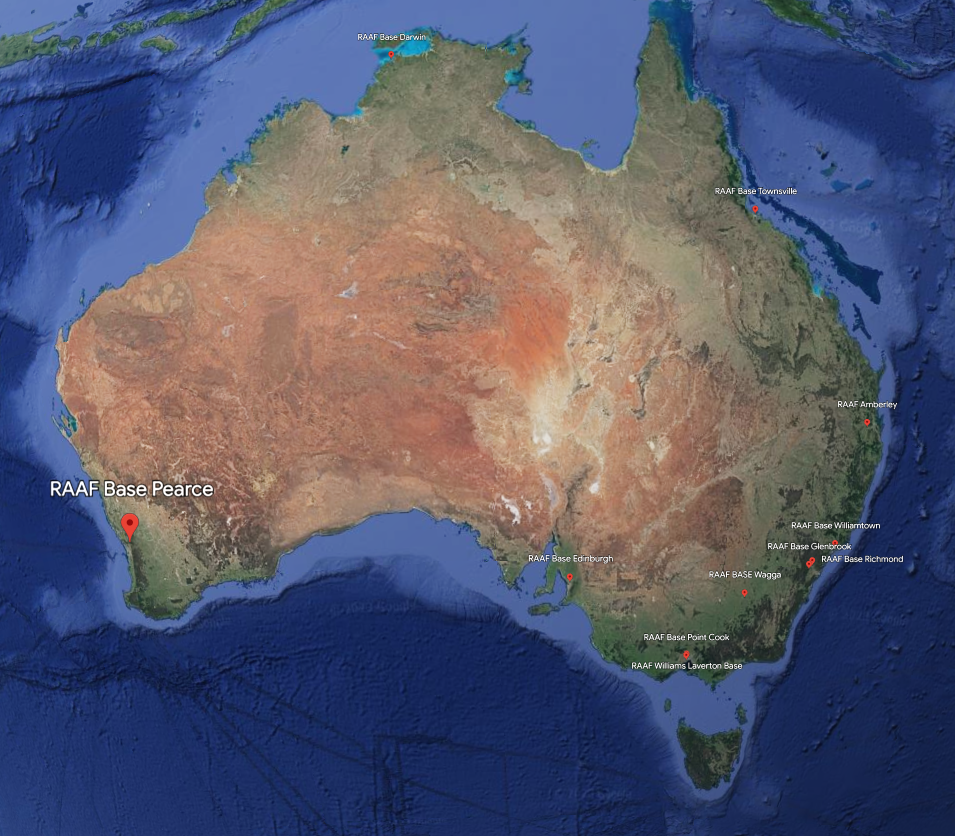

***Figure 1***

RAAF Base Pearce can be seen as the only red dot (RAAF base) in all of Western Australia. Becuase it is the only air base for Australia on the west side of the continent, it is one of Australia's most key military logistics hubs. It is also the permanent home of two Royal Singaporean Air Force squadrons. 

Source: [Google Earth search 11 September 2023](https://earth.google.com/web/search/raaf+base/@-27.74722575,138.11954158,2201.13851529a,6828172.78414607d,35y,0.11517909h,0.58222957t,360r/data=CnoaUBJKCiQweDJiY2Q0YThiMzczNDkzMWQ6MHhmMDRmMGI2MThmMGYwNjAZ41acxeaqP8Ah-MicHd8BXUAqEFJBQUYgQmFzZSBQZWFyY2UYAiABIiYKJAmmSnMpzwUUQBHCuf6Pf-RAwBmQxn0x-BplQCF3a2rjEx1mwA)

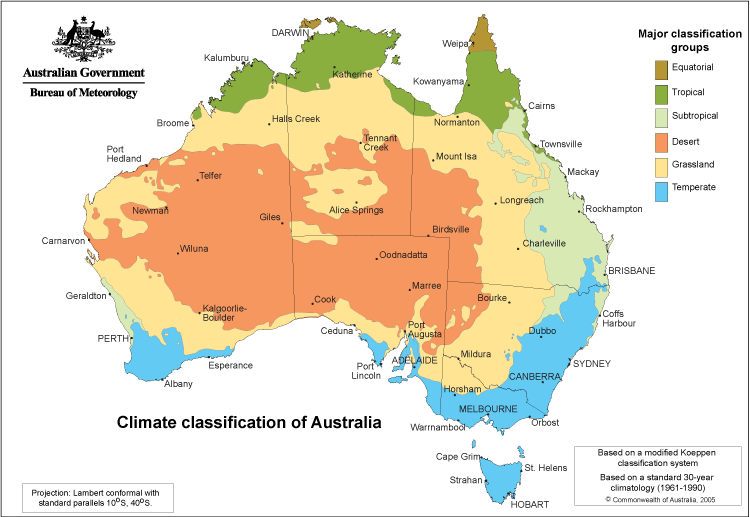

***Figure 2***

A Bureau of Meteorology map depicting the Koeppen climate zones for Australia. Perth and RAAF Base Pearce are located in the Southwest corner at a juncture between temperate, subtropical, and grassland climate zones.  

Source: [Bureau of Meteorology Climate Maps, web search on 11 September 2023](http://www.bom.gov.au/climate/maps/averages/climate-classification/?maptype=kpngrp)

## 2. Data Understanding

### 2a. Loading the Data

##### 2a1. Loading From CSV and Getting Initial View Into Table
From the original 145,000 row dataset of 49 different locations, we reduce down to all rows (entries) for RAAF Base Pearce (3,009 rows total).

From there, we get some preliminary descriptive data from the DataFrame using '.head()' to show the first five rows, and '.describe()' to get summary statistics on each column (attribute) in the table.

In [117]:
import pandas as pd

full_df = pd.read_csv('weatherAUS.csv')
print(len(full_df))

145460


In [118]:
df = full_df[full_df['Location'] == 'PearceRAAF'].reset_index(drop=True)
print(len(df))
df.head()

3009


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,PearceRAAF,18.8,38.4,0.0,NaN,13.1,E,50.0,ESE,...,46.0,20.0,1010.4,1007.2,NaN,NaN,23.1,35.6,No,No
1,2009-01-02,PearceRAAF,22.0,39.1,0.0,NaN,13.2,E,52.0,NW,...,38.0,23.0,1008.3,1007.4,NaN,NaN,27.1,36.0,No,No
2,2009-01-03,PearceRAAF,15.9,35.6,0.0,NaN,12.7,NaN,NaN,S,...,58.0,29.0,1012.1,1010.2,NaN,NaN,24.0,34.8,No,No
3,2009-01-04,PearceRAAF,NaN,37.0,0.0,NaN,13.3,SE,43.0,SE,...,45.0,19.0,1016.6,1012.6,NaN,NaN,22.7,35.2,No,No
4,2009-01-05,PearceRAAF,21.8,38.6,0.0,NaN,13.2,E,59.0,ESE,...,35.0,15.0,1014.1,1010.1,NaN,NaN,26.8,37.3,No,No


In [119]:
df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,3009,3009,2987.000000,2988.000000,2762.000000,0.0,3004.000000,2864,2864.000000,2918,...,2989.000000,2982.000000,2988.000000,2981.000000,1966.000000,1881.000000,2991.000000,2983.000000,2762,2762
unique,3009,1,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2009-01-01,PearceRAAF,NaN,NaN,NaN,NaN,NaN,E,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,1,3009,NaN,NaN,NaN,NaN,NaN,521,NaN,438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2257,2257
mean,NaN,NaN,12.303850,26.051238,1.669080,NaN,8.795306,NaN,43.579958,NaN,...,60.823352,42.079142,1017.635609,1015.096075,3.846389,4.031366,18.832230,24.497083,NaN,NaN
std,NaN,NaN,5.243401,6.866217,5.260833,NaN,3.455666,NaN,12.254543,NaN,...,20.258146,18.429656,6.347568,6.086355,2.988154,2.837735,5.642549,6.628951,NaN,NaN
min,NaN,NaN,-1.900000,11.600000,0.000000,NaN,0.000000,NaN,17.000000,NaN,...,10.000000,7.000000,996.900000,992.600000,0.000000,0.000000,3.700000,9.300000,NaN,NaN
25%,NaN,NaN,8.700000,20.300000,0.000000,NaN,6.600000,NaN,35.000000,NaN,...,45.000000,28.000000,1013.000000,1010.700000,1.000000,1.000000,14.600000,19.100000,NaN,NaN
50%,NaN,NaN,12.200000,25.100000,0.000000,NaN,9.400000,NaN,43.000000,NaN,...,60.000000,41.000000,1017.400000,1014.800000,4.000000,4.000000,18.500000,23.600000,NaN,NaN
75%,NaN,NaN,15.900000,31.400000,0.175000,NaN,11.500000,NaN,50.000000,NaN,...,77.000000,54.000000,1022.100000,1019.300000,7.000000,7.000000,22.800000,29.500000,NaN,NaN


Here we run into our first obstacle... my initial assumption about the distribution of rain to no-rain days being roughly equal based on a temperate/subtropical climate has proven to be incorrect. Above we find that the amount of no-rain days (using description info from the 'RainToday' column is 2,257 total out of 3,009 rows. Accounting for null or erroneous values, this is still 75% of dataset. I will need to acocunt for this imbalance between rain and no-rain entries in the data.

##### 2a2. Dropping Attributes Not Needed
I have chosen to drop the following columns:
 - **Location:** We are only looking at a single location so this attribute is no longer needed
 - **Rainfall:** The "Rainfall" and "RainToday" columns are highly correlated. The information in this column is only useful if we wanted to see if there was rain >0mm and <1mm on a day marked as "no" in the "RainToday" column.
 - **Evaporation:** Discussed in section 2b.
 - **"9am readings":**
     - (WindDir9am, WindSpeed9am, Humidity9am, Pressure9am, Cloud9am, Temp9am)
     - Out of the 9am and 3pm readings, I kept only the 3pm readings because they are closer in time to the next day and will perhaps be a better prediction of the next day's rain possibility
 - **Cloud3pm:** I am going to use "Sunshine" (a measurement of the total hours of sunshine in the day) rather than the cloud measurements to approximate how cloudy it was for the full day.
 - **WindSpeed3pm & WindDir3pm:** I am going to just use the max wind gust speed and direction (WindGustDir & WindGustSpeed) for this analysis

In [120]:
dropped_cols = [
    'Location',
    'Rainfall',
    'Evaporation',
    'WindDir9am',
    'WindSpeed9am',
    'WindDir3pm',
    'WindSpeed3pm',
    'Humidity9am',
    'Pressure9am',
    'Cloud9am',
    'Cloud3pm',
    'Temp9am',
    'Temp3pm'
]

df = df.drop(columns=dropped_cols)
df.head()

,Date,MinTemp,MaxTemp,Sunshine,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,2009-01-01,18.8,38.4,13.1,E,50.0,20.0,1007.2,No,No
1,2009-01-02,22.0,39.1,13.2,E,52.0,23.0,1007.4,No,No
2,2009-01-03,15.9,35.6,12.7,NaN,NaN,29.0,1010.2,No,No
3,2009-01-04,NaN,37.0,13.3,SE,43.0,19.0,1012.6,No,No
4,2009-01-05,21.8,38.6,13.2,E,59.0,15.0,1010.1,No,No


This leaves me with the date column (the unique identifier of each row or entry), 6 categories to analyze (below)...
 - Temperature (MinTemp & MaxTemp)
 - Amount of sunshine (Sunshine)
 - Wind information (WindGustDir & WindGustSpeed)
 - Humidity (Humidity3pm)
 - Pressure (Pressure3pm)
 - Yes/No did it rain today? (RainToday)

...and 1 column to be my ground truth for my predictions (RainTomorrow). This is the actual truth as to whether or not it did in fact rain the next day. 

###### 2a3. Prepping for Data Type Changes
I now need to change the data types for each column. I will start by changing inspecting the current data types, deciding what data type to change each column to, and making my first steps in those changes.

First I print the current data types:

In [121]:
print(df.dtypes)

Date              object
MinTemp          float64
MaxTemp          float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
Humidity3pm      float64
Pressure3pm      float64
RainToday         object
RainTomorrow      object
dtype: object


The following changes are needed to optimize the datatypes of the columns:
 - **Date:** Change from object to a datetime object
 - **Numerical Columns:** These will remain a float but will only keep to one decimal place
   - MinTemp
   - MaxTemp
   - Sunshine
   - WindGustSpeed
   - Humidity3pm
   - Pressure3pm
 - **Boolean Columns:** Both RainToday and RainTomorrow are changed from objects to boolean integers (0 or 1)
 - **Categorical Column:** WindGustDir is made up of 16 categories of compass directions which I will map to integers
   - ***Note:*** Because this column contains null values (as 'NaN'), I need to also map these entries onto their own integer that won't interfere with with compass direction integer map. This is done so there is not an error thrown when applying '.astype(int)' to this column. I will keep this column as floats for now, and change to int after handling the null values.

In [122]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date

numerical_columns = [
    'MinTemp',
    'MaxTemp',
    'Sunshine',
    'WindGustSpeed',
    'Humidity3pm',
    'Pressure3pm'
]

for column in numerical_columns:
    df[column] = df[column].astype(float).round(1)

boolean_columns = ['RainToday', 'RainTomorrow']

for column in boolean_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

wind_directions = {
    'N': 1, 'NNE': 2, 'NE': 3, 'ENE': 4,
    'E': 5, 'ESE': 6, 'SE': 7, 'SSE': 8,
    'S': 9, 'SSW': 10, 'SW': 11, 'WSW': 12,
    'W': 13, 'WNW': 14, 'NW': 15, 'NNW': 16
}

df['WindGustDir'] = df['WindGustDir'].map(wind_directions)
                                
df.head()

,Date,MinTemp,MaxTemp,Sunshine,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,2009-01-01,18.8,38.4,13.1,5.0,50.0,20.0,1007.2,0.0,0.0
1,2009-01-02,22.0,39.1,13.2,5.0,52.0,23.0,1007.4,0.0,0.0
2,2009-01-03,15.9,35.6,12.7,NaN,NaN,29.0,1010.2,0.0,0.0
3,2009-01-04,NaN,37.0,13.3,7.0,43.0,19.0,1012.6,0.0,0.0
4,2009-01-05,21.8,38.6,13.2,5.0,59.0,15.0,1010.1,0.0,0.0


In [123]:
df.dtypes

Date              object
MinTemp          float64
MaxTemp          float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
Humidity3pm      float64
Pressure3pm      float64
RainToday        float64
RainTomorrow     float64
dtype: object

### 2b. Verifying Data Quality

##### 2b1. Finding duplicates
Now we look to see if there are any duplicated entries in the data

In [124]:
print(df.duplicated().sum())

0


Because there are zero duplicated entires, we can move on to evaluating null values column by column.

##### 2b2. Null Value Handling
In section 2a we converted all null values to either -1 or -1.0 for ease of converting each column to their appropriate datatype. Now we must investigate and handle the null values for each column.

Let's visualize the null values

In [125]:
sum_nan = df.isna().sum()
print(sum_nan)

Date               0
MinTemp           22
MaxTemp           21
Sunshine           5
WindGustDir      145
WindGustSpeed    145
Humidity3pm       27
Pressure3pm       28
RainToday        247
RainTomorrow     247
dtype: int64


Let's start with **wind**:
 - I see that both WindGustDir and WindGustSpeed have exactly the same number of null values. Perhaps the BoM recorded wind gusts and wind speed as null if there was no wind that day.
 - If all the null entries of WindGustDir are the exact same entries as WindGustSpeed, I will assume that this is the case, and will replace these values with 0 and adjust my WindGustDir integer map to include 0 as 0 wind.

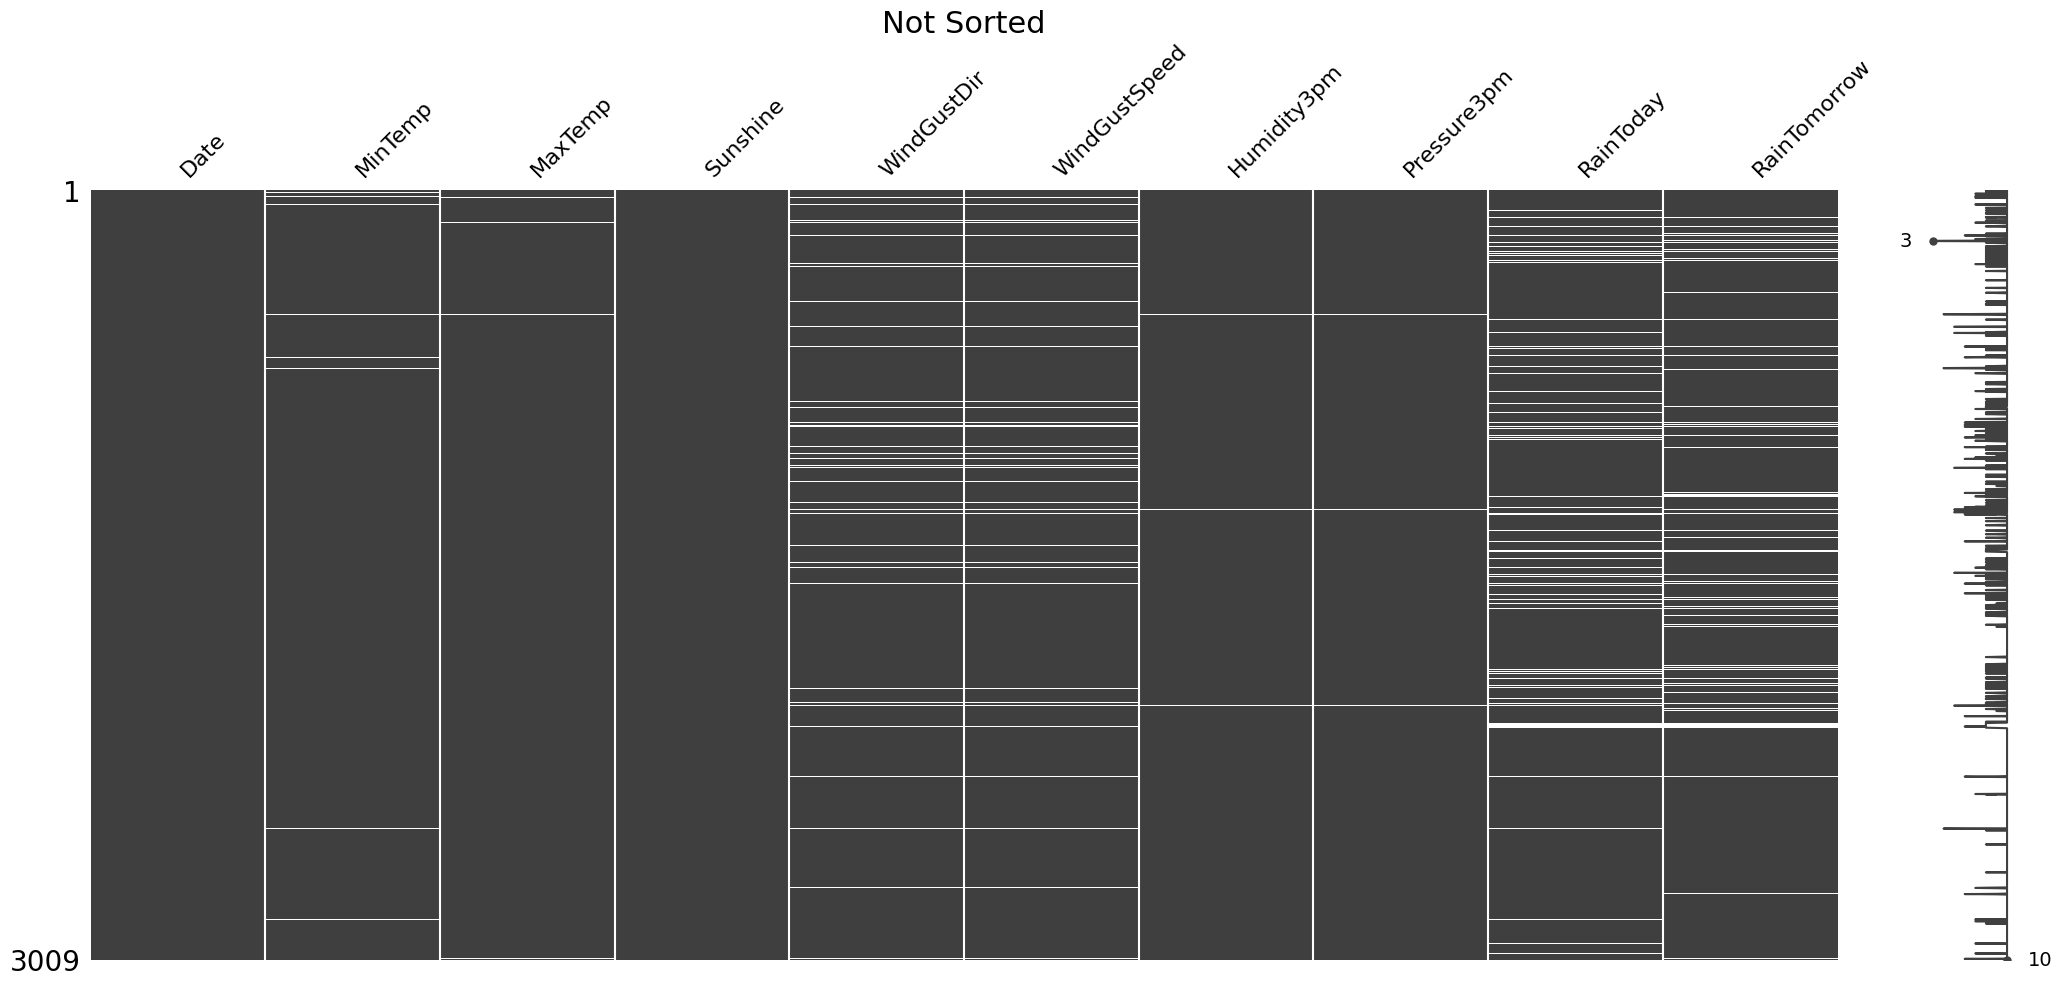

In [126]:
import missingno as mn
import matplotlib.pyplot as plt
%matplotlib inline

mn.matrix(df)
plt.title("Not Sorted", fontsize=22)
plt.show()

<Figure size 640x480 with 0 Axes>

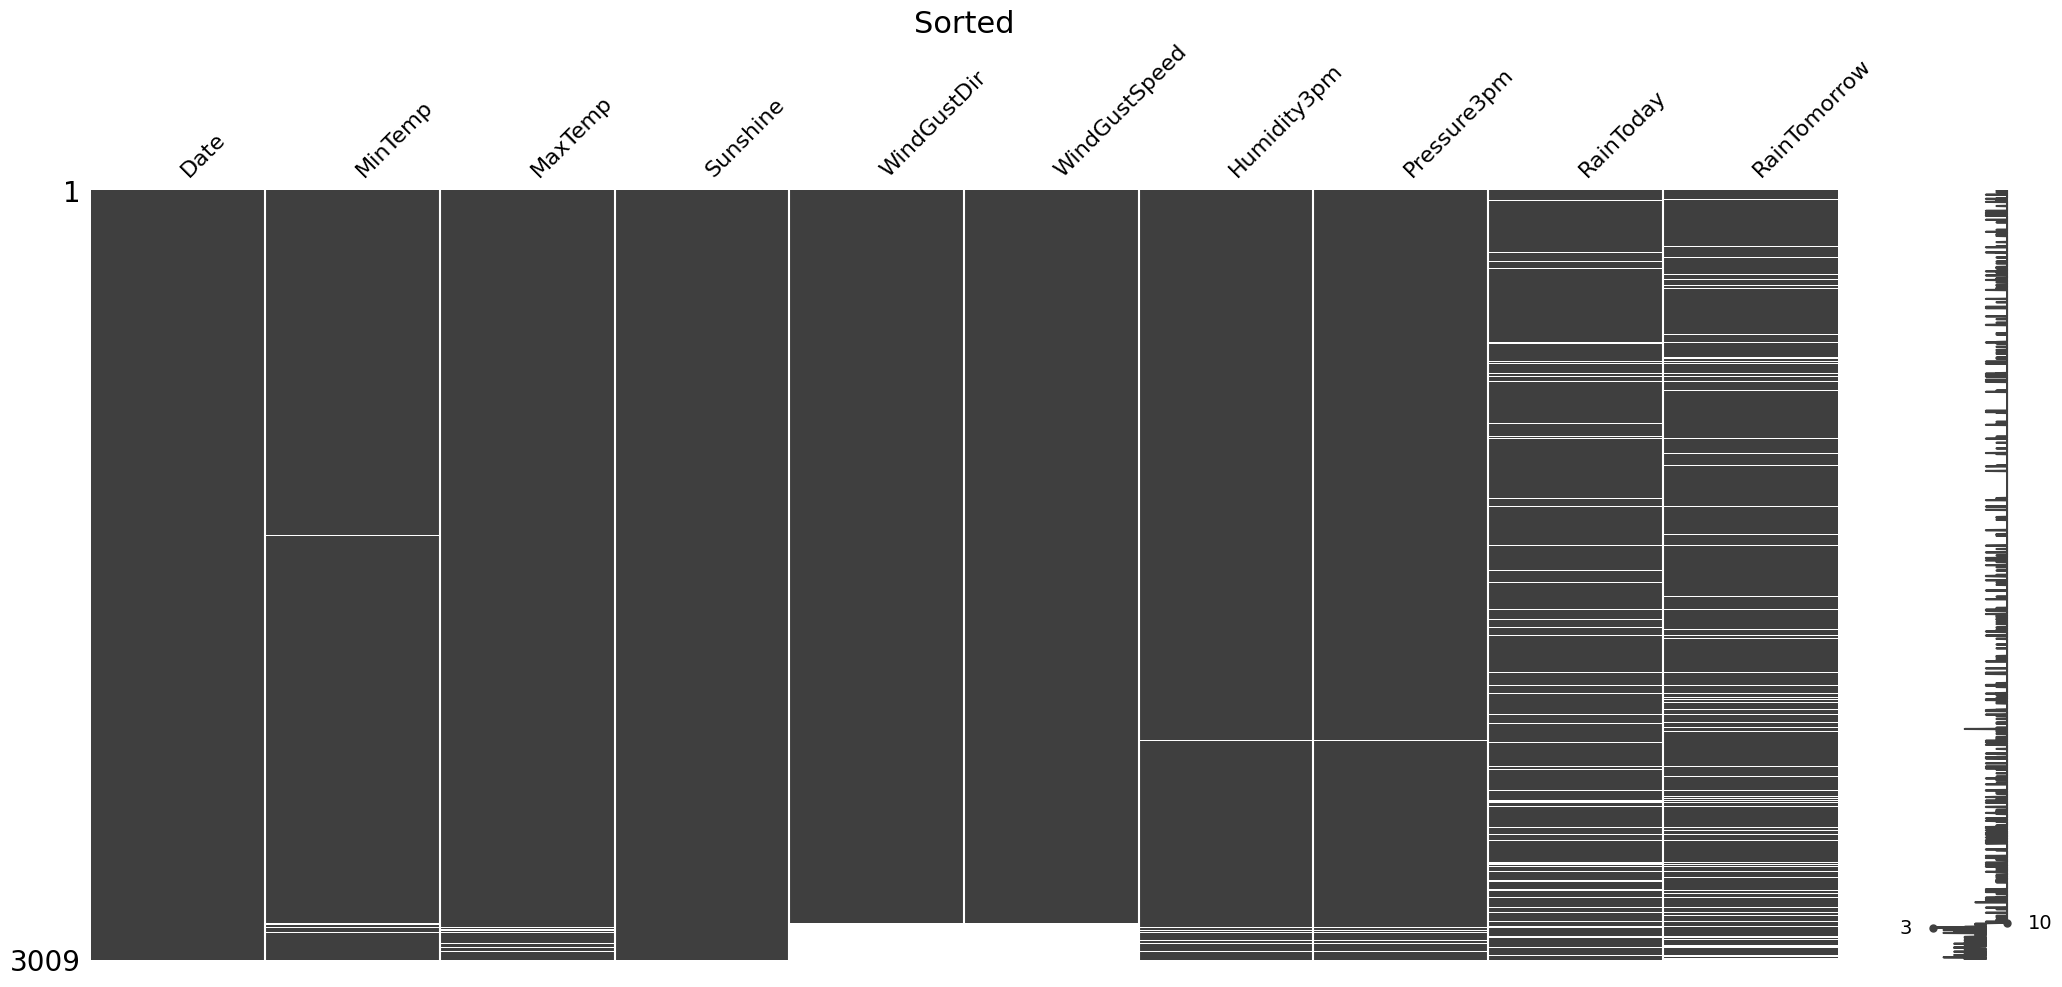

In [127]:
plt.figure()
mn.matrix(df.sort_values(by=["WindGustDir", "WindGustSpeed"]))
plt.title("Sorted", fontsize=22)
plt.show()

It does appear that all the null values for WindGustDir are the same null value entries for WindGustSpeed. I am now making the assumption that the BoM recorded zero wind days with null values.

In [128]:
df['WindGustDir'] = df['WindGustDir'].fillna(0).astype(int)
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(0)
df.head()

,Date,MinTemp,MaxTemp,Sunshine,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,2009-01-01,18.8,38.4,13.1,5,50.0,20.0,1007.2,0.0,0.0
1,2009-01-02,22.0,39.1,13.2,5,52.0,23.0,1007.4,0.0,0.0
2,2009-01-03,15.9,35.6,12.7,0,0.0,29.0,1010.2,0.0,0.0
3,2009-01-04,NaN,37.0,13.3,7,43.0,19.0,1012.6,0.0,0.0
4,2009-01-05,21.8,38.6,13.2,5,59.0,15.0,1010.1,0.0,0.0


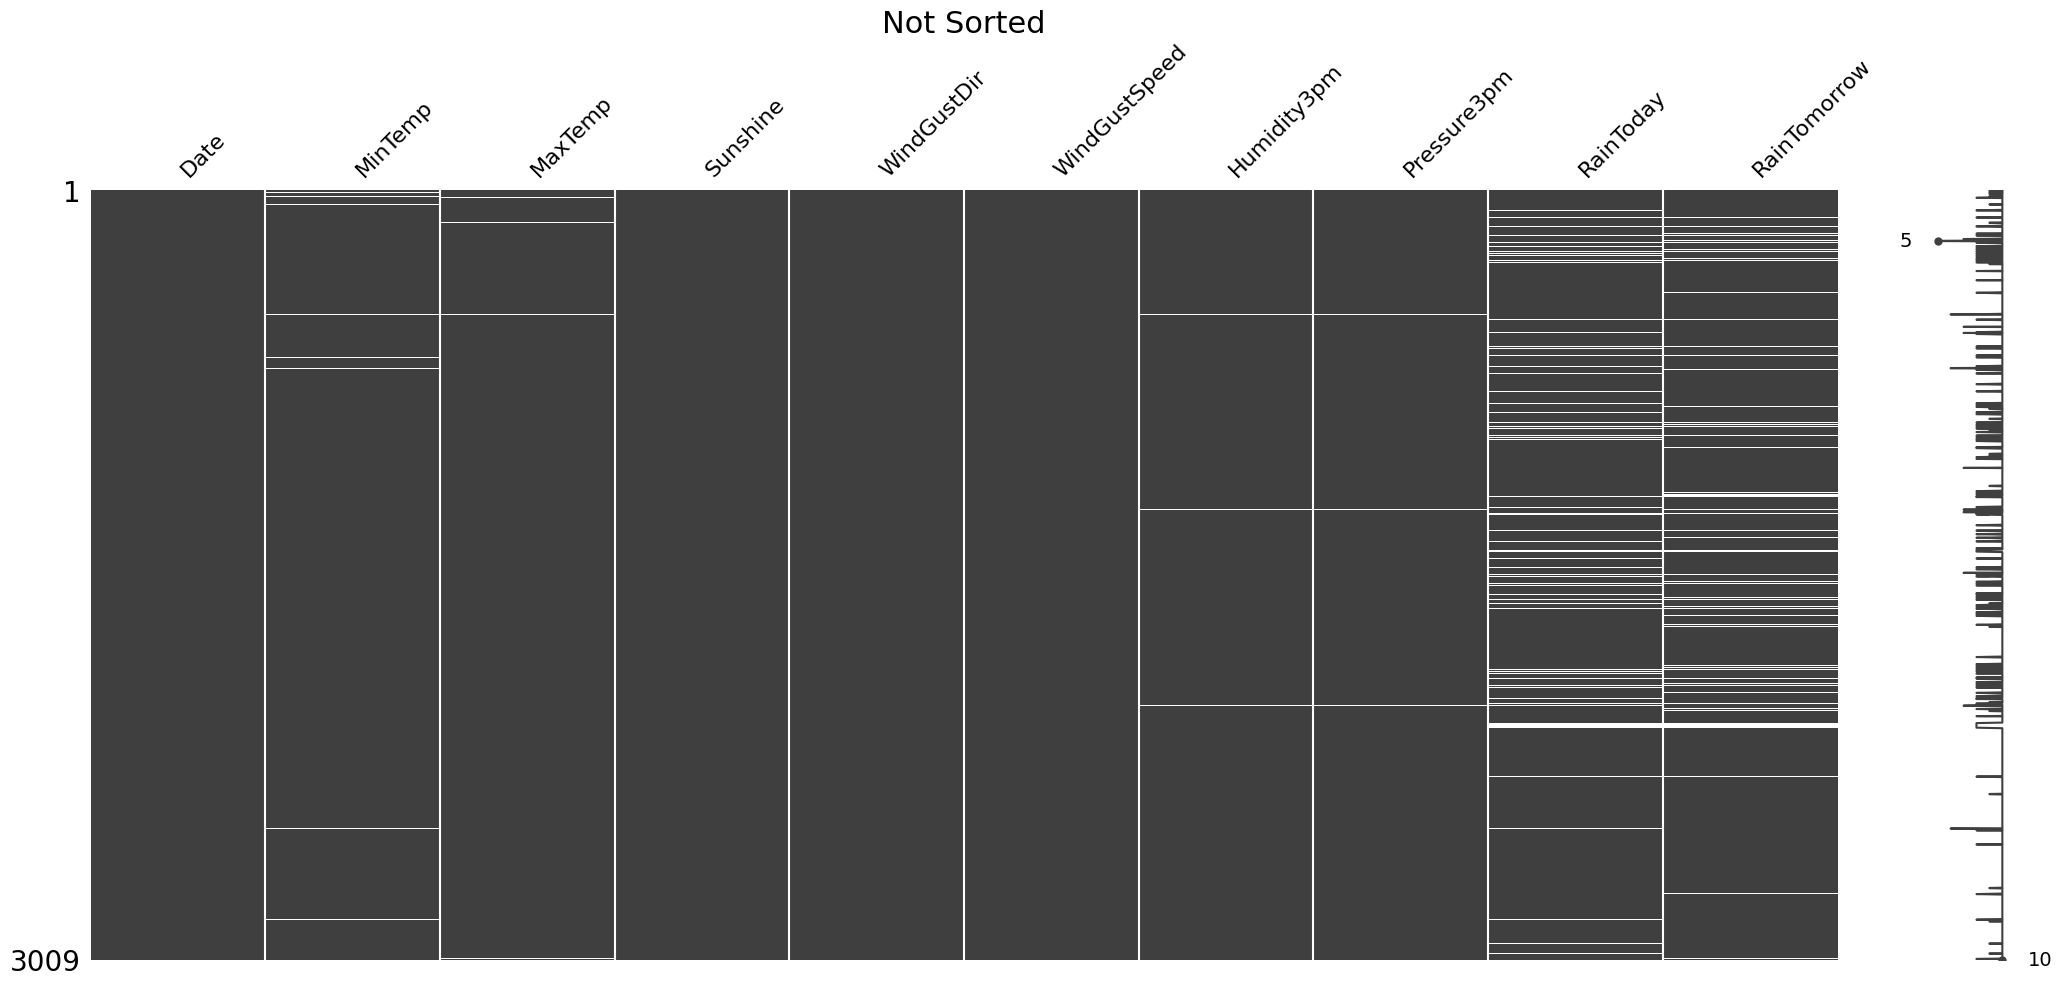

In [129]:
mn.matrix(df)
plt.title("Not Sorted", fontsize=22)
plt.show()

It appears that most of the null values for Humidity and Pressure are in the same category. However, because it is impossible to have a zero pressure reading on Earth, I will assume that the instruments did not take recordings any time the pressure has a null value. Because of this reason, I am dropping the entries with null Pressure values.

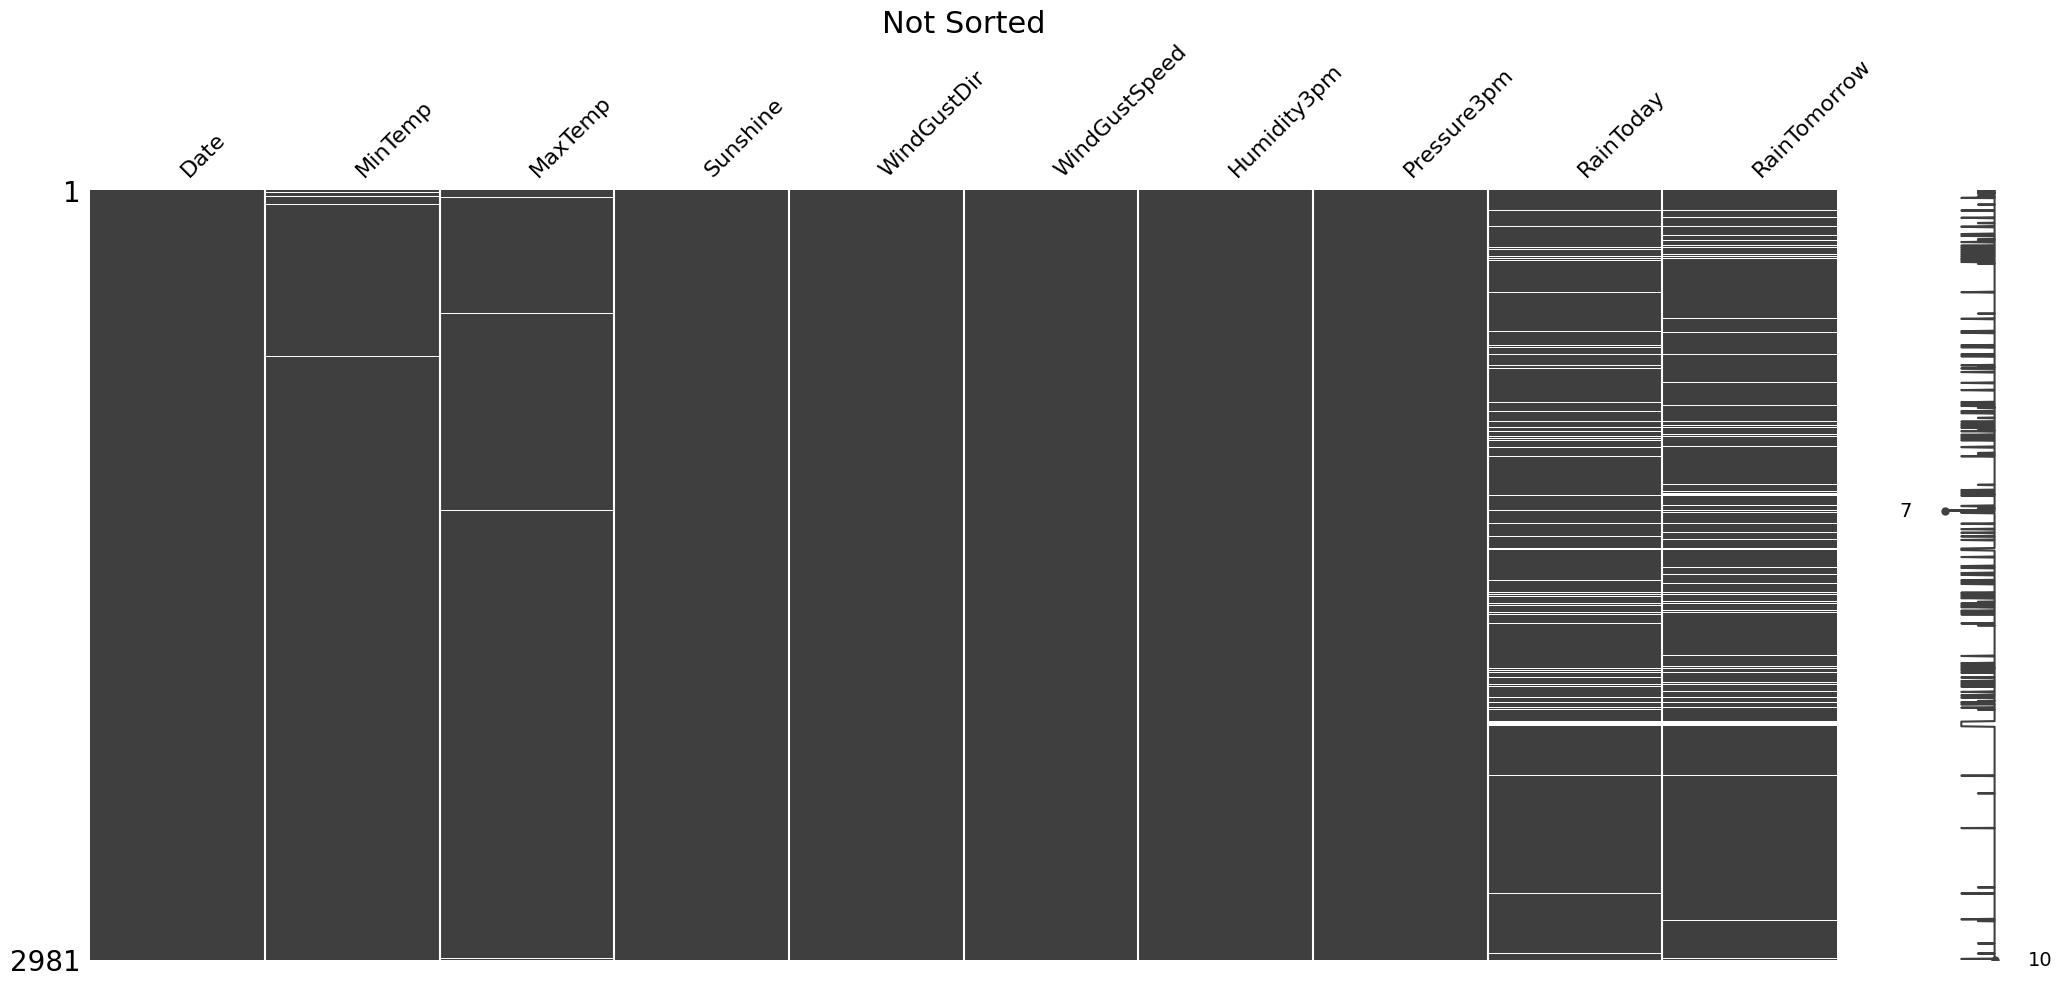

In [130]:
df.dropna(subset=['Pressure3pm'], inplace=True)

mn.matrix(df)
plt.title("Not Sorted", fontsize=22)
plt.show()

Because we have an abundance of data, and it appears that there are only a few entries with null values in teh MinTemp, MaxTemp, and Sunshine colums, I will drop all entries with null values in these columns as well.

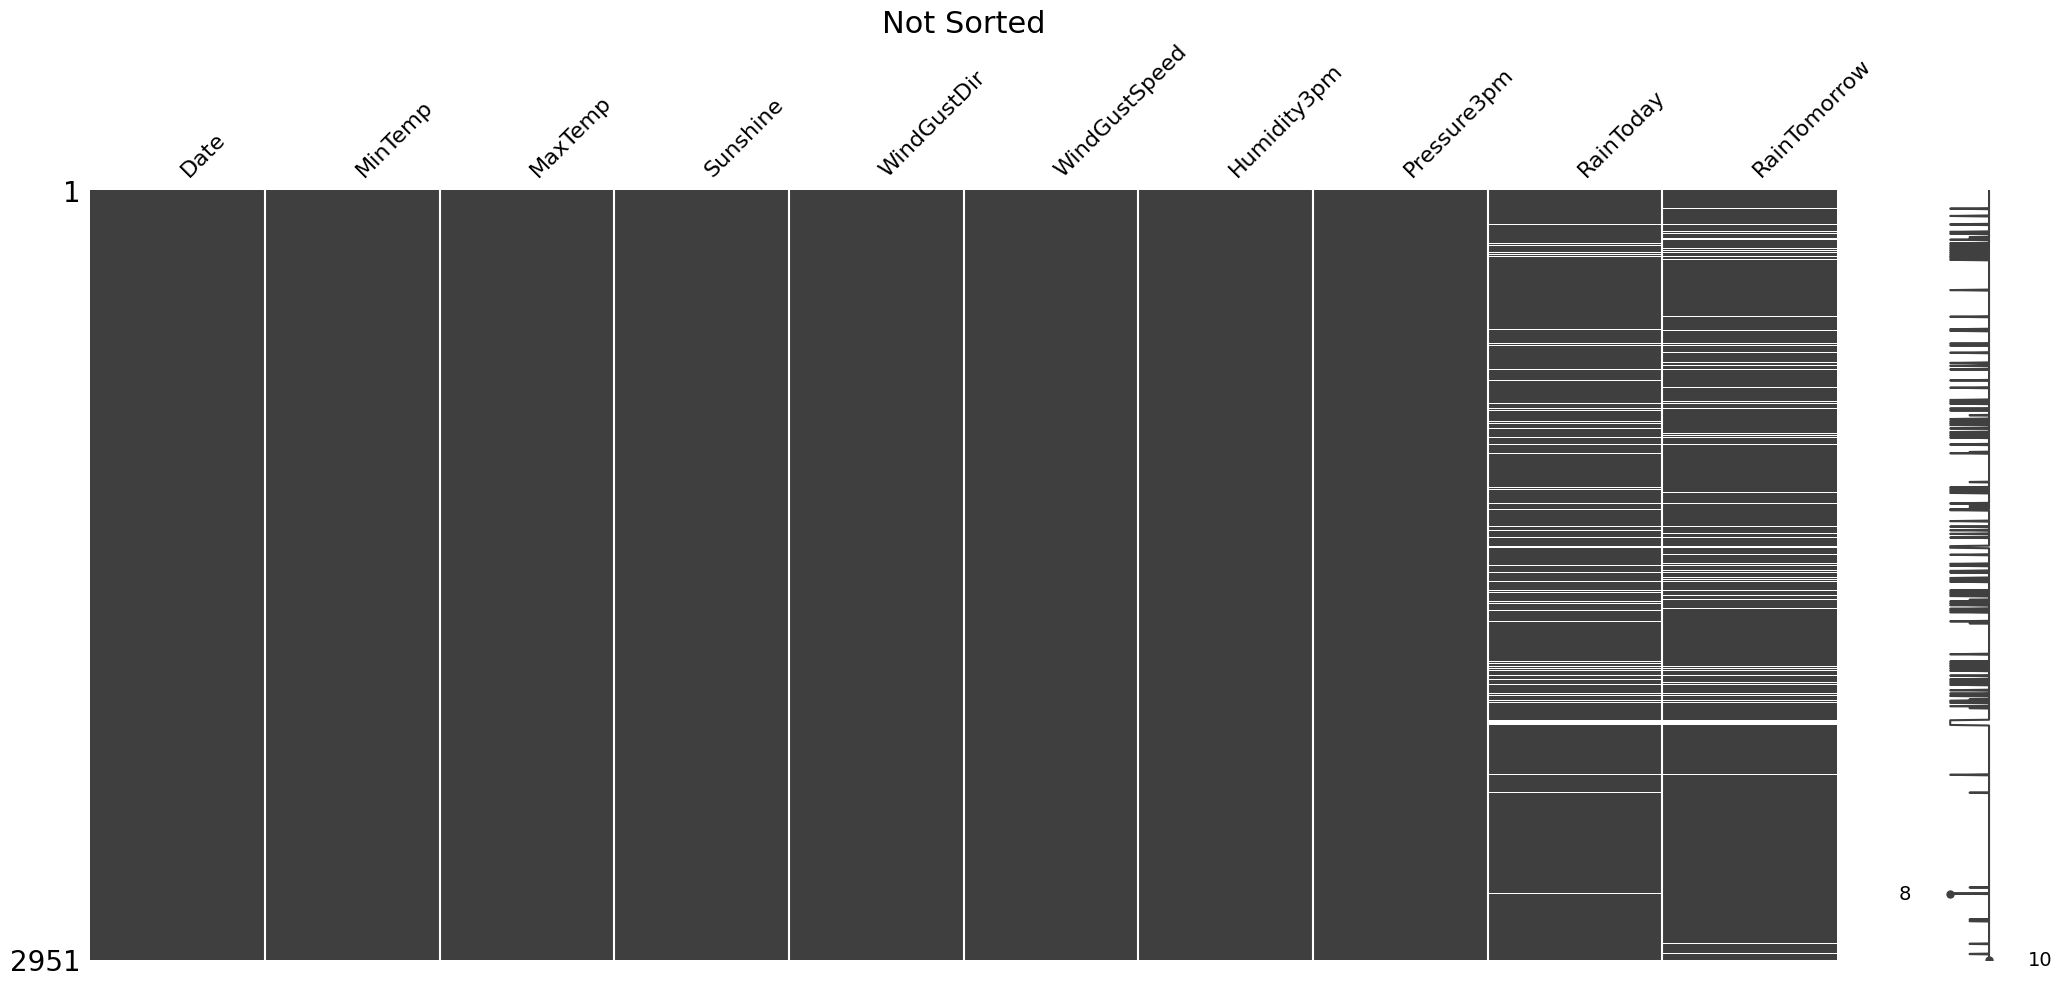

In [131]:
df.dropna(subset=['MinTemp', 'MaxTemp', 'Sunshine'], inplace=True)

mn.matrix(df)
plt.title("Not Sorted", fontsize=22)
plt.show()

Now for the rain columns. It is harder to intuitively understand why there would be null values for the RainToday and RainTomorrow columns, but because there are so many, we cannot just eliminate them from our data.

Let's sort the entries with null values for both and eliminate.

<Figure size 640x480 with 0 Axes>

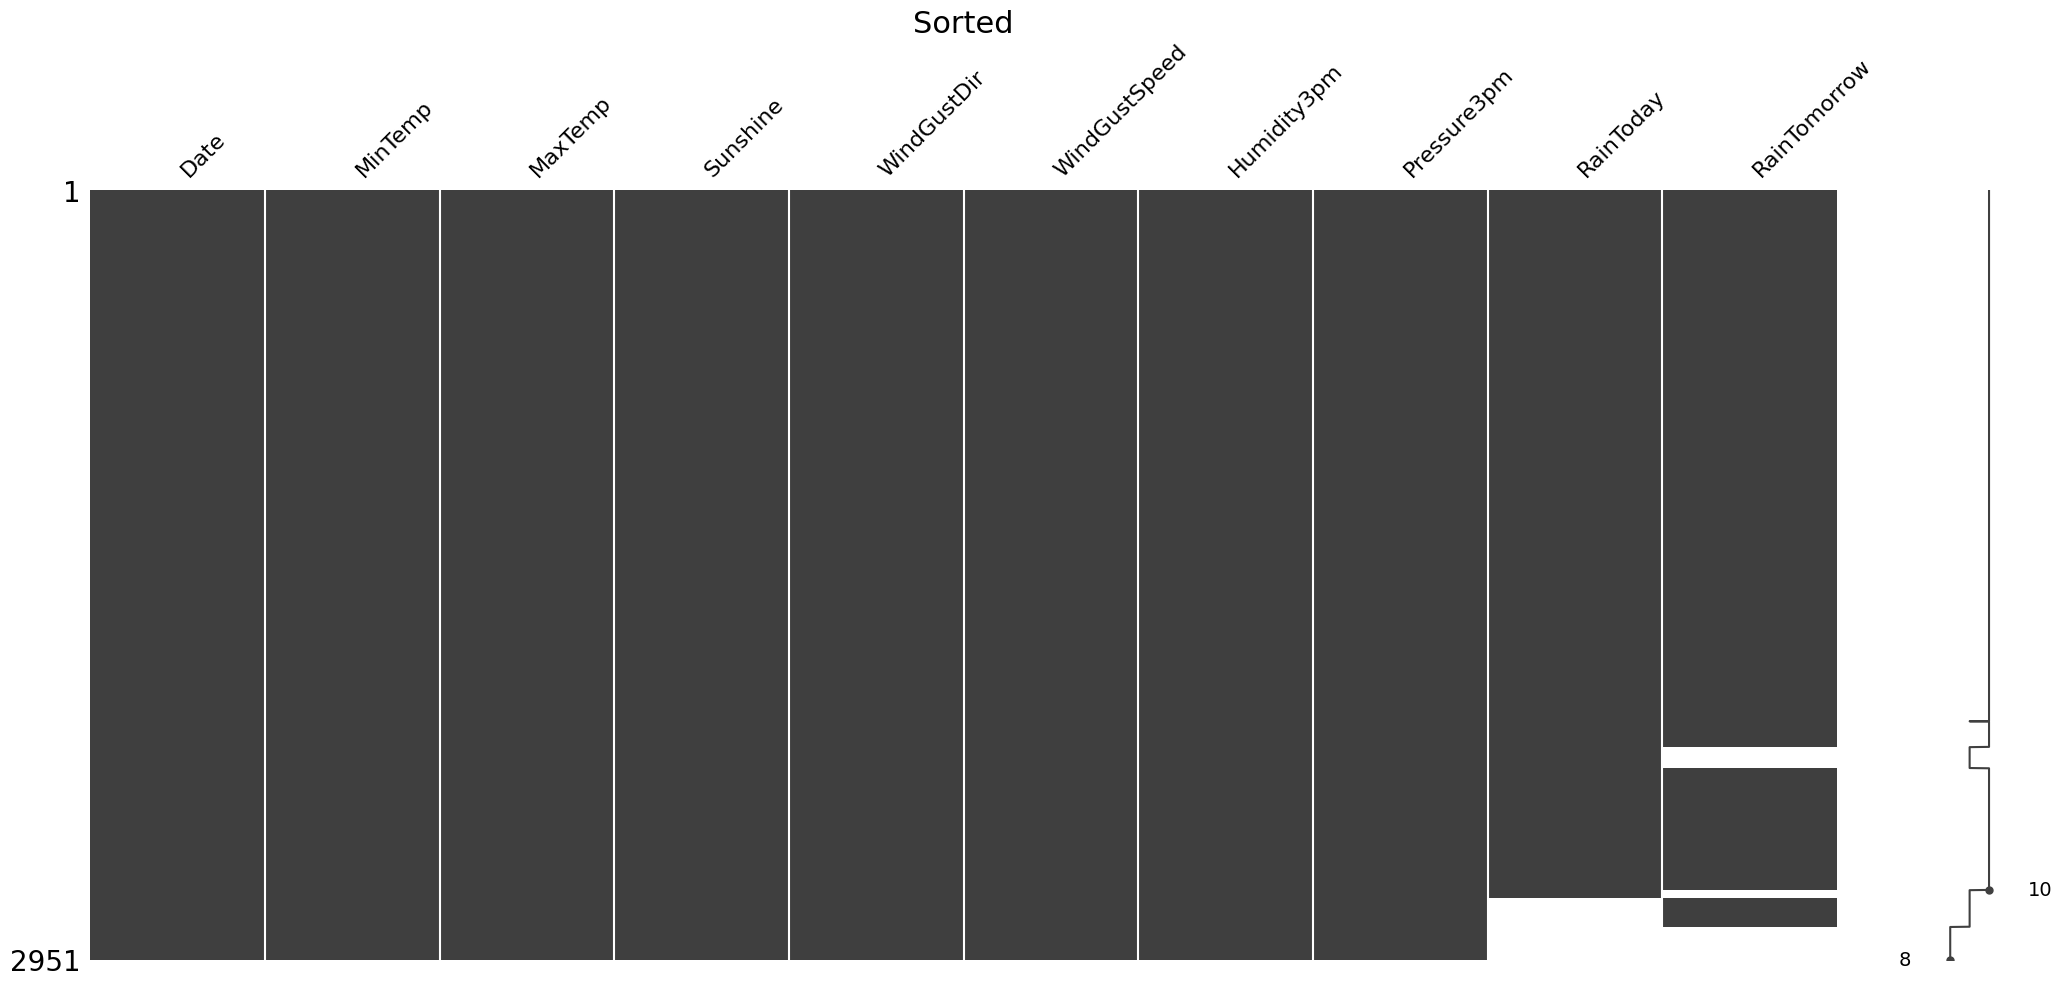

In [132]:
plt.figure()
mn.matrix(df.sort_values(by=["RainToday", "RainTomorrow"]))
plt.title("Sorted", fontsize=22)
plt.show()

<Figure size 640x480 with 0 Axes>

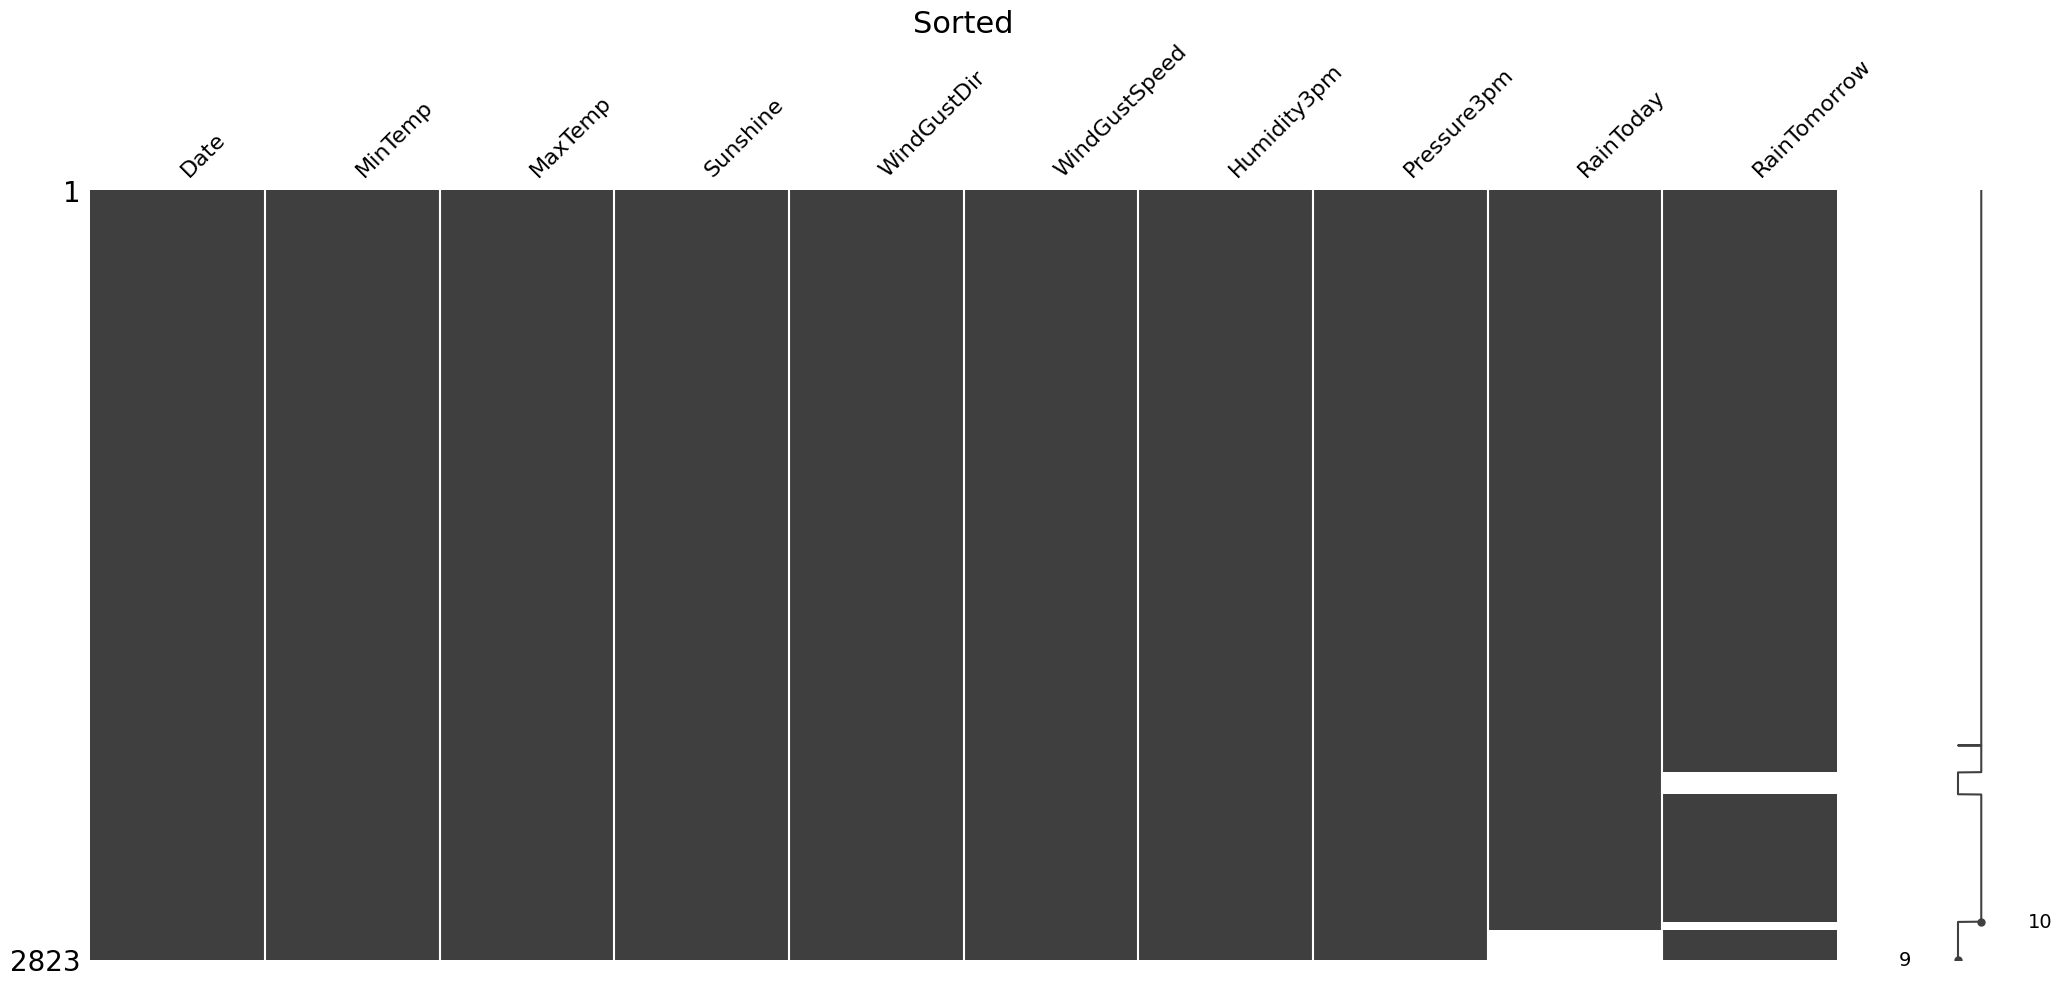

In [133]:
df = df.dropna(subset=['RainToday', 'RainTomorrow'], how='all')

plt.figure()
mn.matrix(df.sort_values(by=["RainToday", "RainTomorrow"]))
plt.title("Sorted", fontsize=22)
plt.show()

With a sizeable number of null entries for RainToday and RainTomorrow left, I have decided to drop all entries where there is null data for either of these two columns. The reason for this is because I do not know how I could impute these values without ultimately skewing my predicted main input variable (RainToday) to determine the source of truth output variable I want to predict (RainTomorrow).

In [134]:
df = df.dropna(subset=['RainToday'])
df = df.dropna(subset=['RainTomorrow'])

print(df.isna().sum())

Date             0
MinTemp          0
MaxTemp          0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
Humidity3pm      1
Pressure3pm      0
RainToday        0
RainTomorrow     0
dtype: int64


It looks like I missed one null entry of Humidity3pm. I will just eliminate that since it is one entry.

In [135]:
df = df.dropna(subset=['Humidity3pm'])

print(df.isna().sum())

Date             0
MinTemp          0
MaxTemp          0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
Humidity3pm      0
Pressure3pm      0
RainToday        0
RainTomorrow     0
dtype: int64


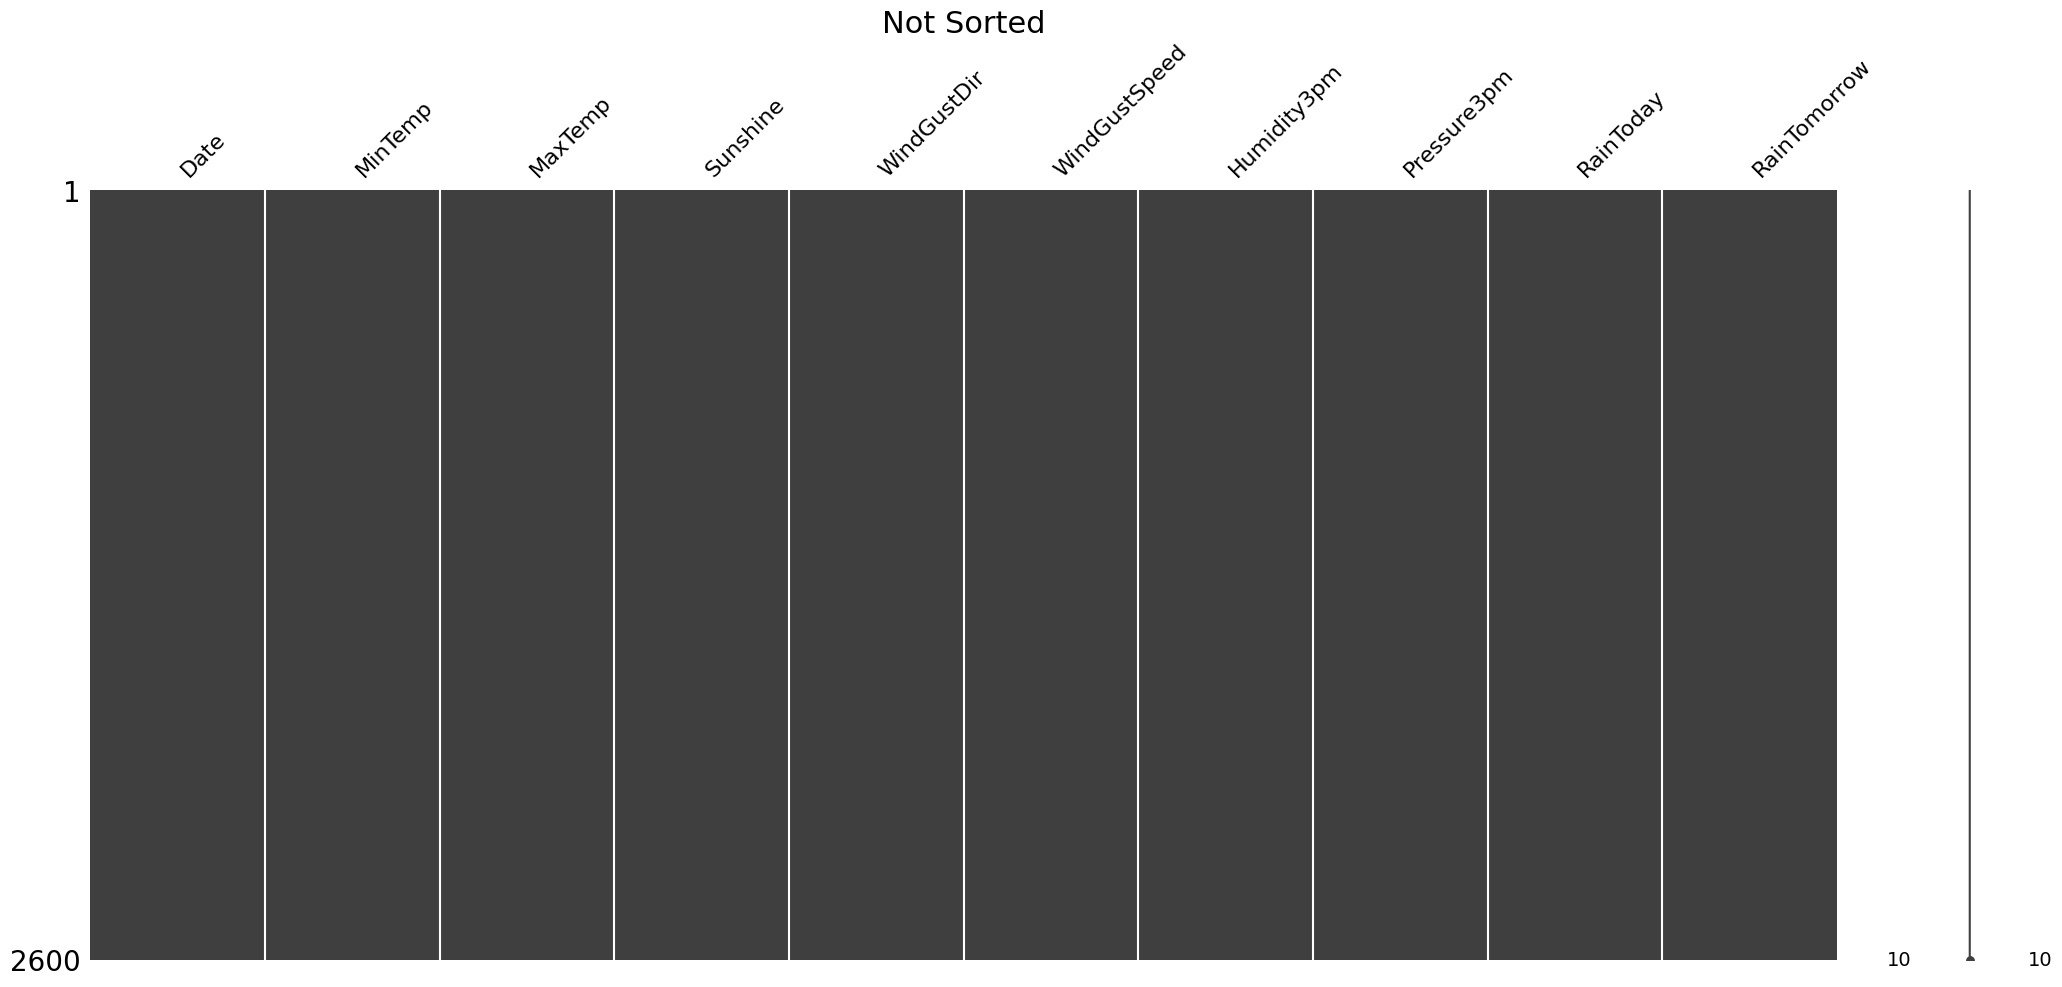

In [136]:
mn.matrix(df)
plt.title("Not Sorted", fontsize=22)
plt.show()

In [137]:
df.dtypes

Date              object
MinTemp          float64
MaxTemp          float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
Humidity3pm      float64
Pressure3pm      float64
RainToday        float64
RainTomorrow     float64
dtype: object

In [138]:
#Can't forget to change the boolean values to integers
boolean_columns = ['RainToday', 'RainTomorrow']

for column in boolean_columns:
    df[column] = df[column].astype(int)
    
df.dtypes

Date              object
MinTemp          float64
MaxTemp          float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
Humidity3pm      float64
Pressure3pm      float64
RainToday          int32
RainTomorrow       int32
dtype: object

I am left with 2,600 entries with no null values and the optimal data types. Time to analyze and visualize.

## 3. Data Visualization

### 3a. Visualizing Basic Features

In [139]:
import seaborn as sns

##### 3a1. Visualizing Wind Gust Directions (Categorical)

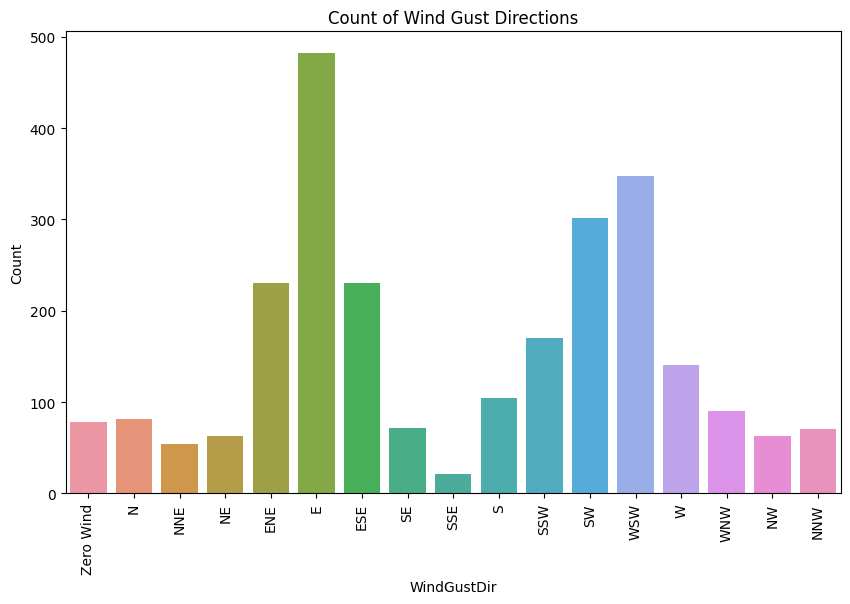

In [140]:
#Here I am getting my integer map for wind directions from earlier
wind_directions = {
    'N': 1, 'NNE': 2, 'NE': 3, 'ENE': 4,
    'E': 5, 'ESE': 6, 'SE': 7, 'SSE': 8,
    'S': 9, 'SSW': 10, 'SW': 11, 'WSW': 12,
    'W': 13, 'WNW': 14, 'NW': 15, 'NNW': 16
}

#And now I am inverting the map back into compass directions for the visualization
map_back = {v: k for k, v in wind_directions.items()}
map_back[0] = 'Zero Wind'

#And finally we plot the countplot of categorical data
plt.figure(figsize=(10, 6))
sns.countplot(x=df['WindGustDir'])
plt.title('Count of Wind Gust Directions')
plt.xlabel('WindGustDir')
plt.ylabel('Count')
plt.xticks(ticks=range(17), labels=[map_back.get(i, '') for i in range(17)], rotation=90)
plt.show()

It appears that two dominate vectors of wind gusts are generally from the East and generally from the West-Southwest. This bimodality could prove useful for our purposes of rain predictions.

Because RAAF Base Pearce and Perth are very close to the western coast of Australia (and the Indian Ocean), perhaps a seasonal weather change accounts for these two major wind directions. One of these might coincide with a rainy season, and account for a majority of the rain recorded in a year.

##### 3a2. Visualizing Continuous Data

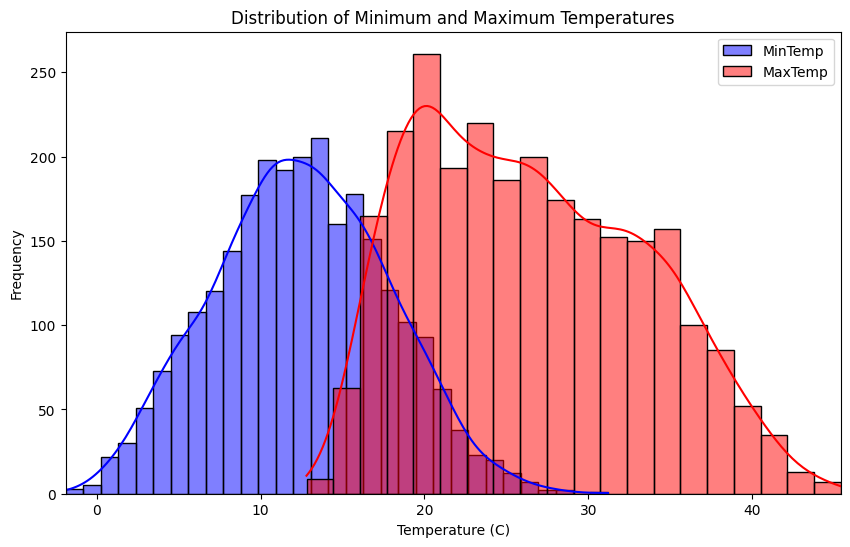

In [141]:
common_x_min = min(df['MinTemp'].min(), df['MaxTemp'].min())
common_x_max = max(df['MinTemp'].max(), df['MaxTemp'].max())

plt.figure(figsize=(10, 6))

sns.histplot(df['MinTemp'], kde=True, color="blue", label="MinTemp")
sns.histplot(df['MaxTemp'], kde=True, color="red", label="MaxTemp", alpha=0.5)

plt.title('Distribution of Minimum and Maximum Temperatures')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.xlim(common_x_min, common_x_max)
plt.legend()

plt.show()

It looks like the minimum temperatures fit more into a standard distribution than the maximum temperatures, which are right skewed. I am not sure yet if this information will be helpful to my analysis.

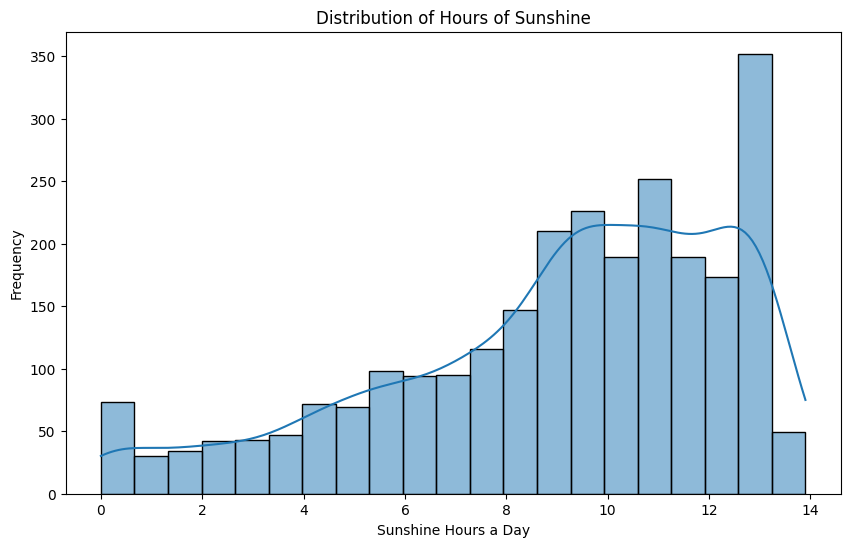

In [142]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sunshine'], kde=True)
plt.title('Distribution of Hours of Sunshine')
plt.xlabel('Sunshine Hours a Day')
plt.ylabel('Frequency')
plt.show()

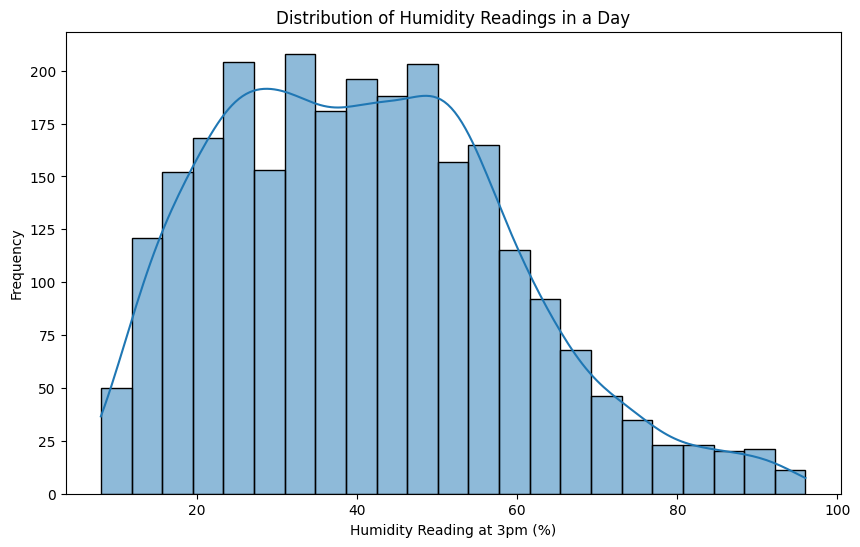

In [143]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Humidity3pm'], kde=True)
plt.title('Distribution of Humidity Readings in a Day')
plt.xlabel('Humidity Reading at 3pm (%)')
plt.ylabel('Frequency')
plt.show()

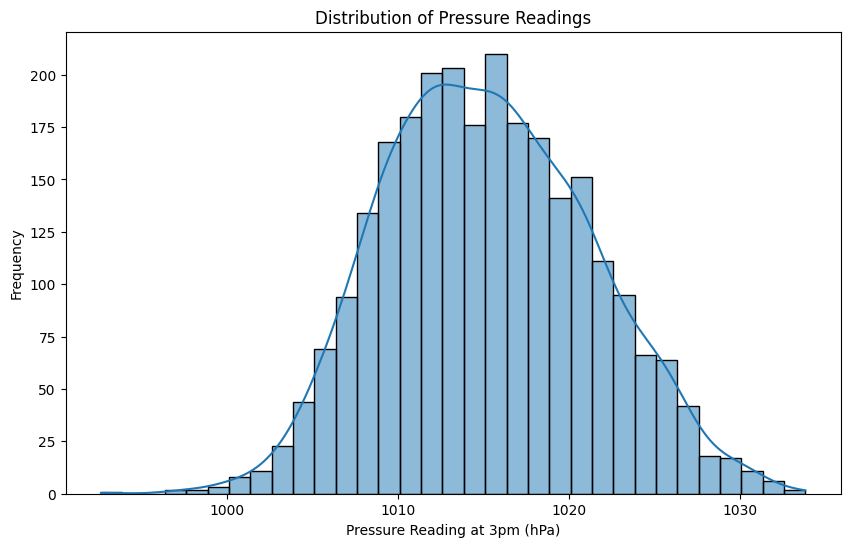

In [144]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Pressure3pm'], kde=True)
plt.title('Distribution of Pressure Readings')
plt.xlabel('Pressure Reading at 3pm (hPa)')
plt.ylabel('Frequency')
plt.show()

Overall, the past 3 visualizations (Sunshine, Humidity3pm, & Pressure3pm) might tell a story together that is useful for my purpose.

Knowing now that ~25% or less of the days are rainy, it appears that the high number of sunny days, coupled with a low number of high humidity and high pressure days (both potentially linked to rainy weather), could help predict if it will rain the next day.

##### 3a3. Final Visualization 
Finally I want to visualize the percentage of rainy vs non-rainy days.

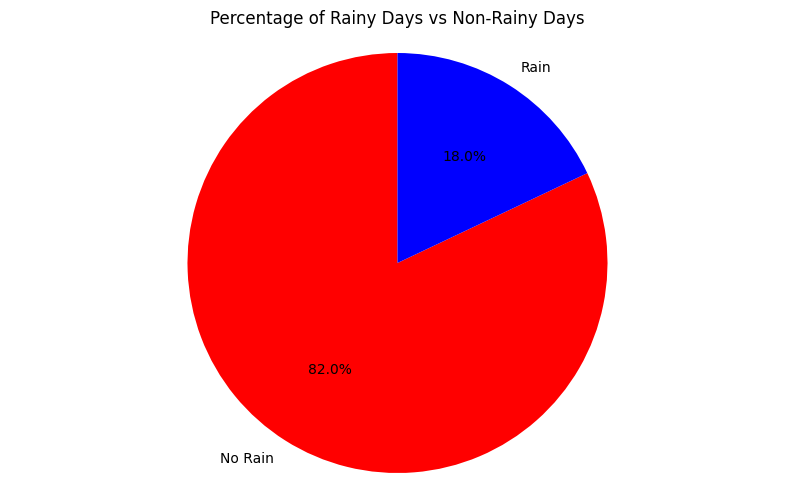

In [145]:
rain_today_counts = df['RainToday'].value_counts(normalize=True) * 100

colors = ['red', 'blue']
labels = ['No Rain', 'Rain']

plt.figure(figsize=(10, 6))
plt.pie(rain_today_counts, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Percentage of Rainy Days vs Non-Rainy Days')
plt.show()

### 3b. Visualizing Interesting Questions

##### 3b1. Does a particular wind direction coincide with rainy days?

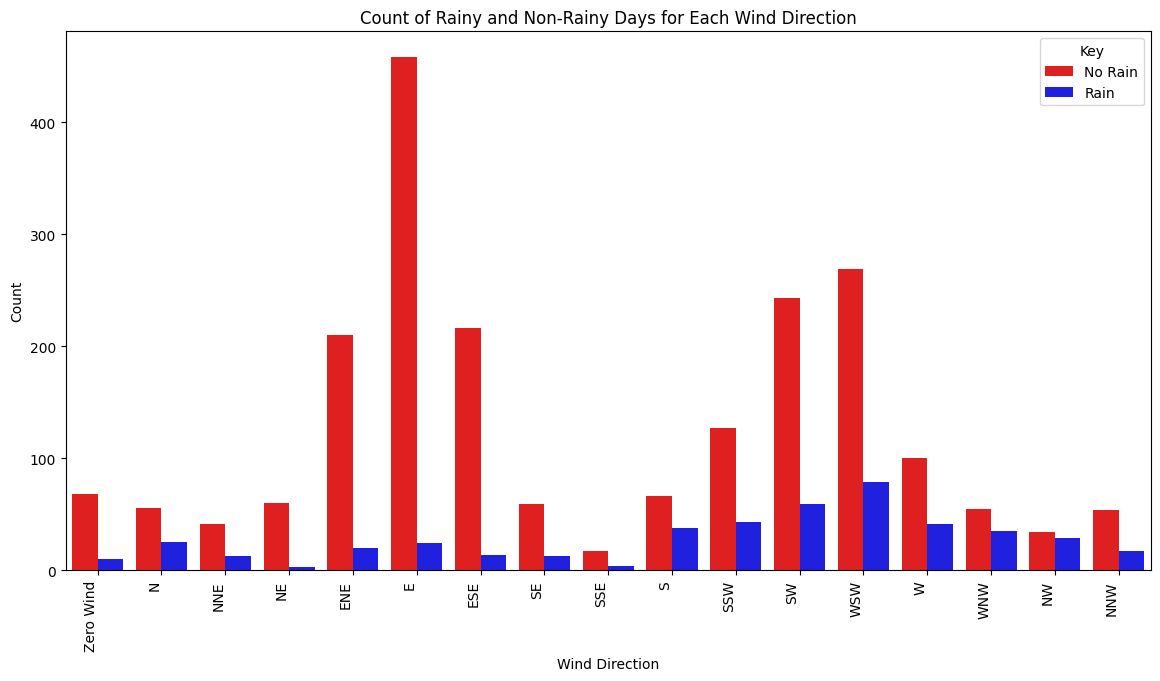

In [146]:
plt.figure(figsize=(14, 7))
sns.countplot(x=df['WindGustDir'], hue=df['RainToday'], palette=['red', 'blue'])

wind_dir_labels = ['Zero Wind', 'N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
plt.xticks(ticks=range(17), labels=wind_dir_labels, ha='right', rotation=90)
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.title('Count of Rainy and Non-Rainy Days for Each Wind Direction')
plt.legend(title='Key', labels=['No Rain', 'Rain'])

plt.show()

There does seem to be a preference for rainy days to occur when the wind is predominantly coming out of the West-Southwest.

##### 3b2. Is there a connection between pressure, humidity, and sunshine?

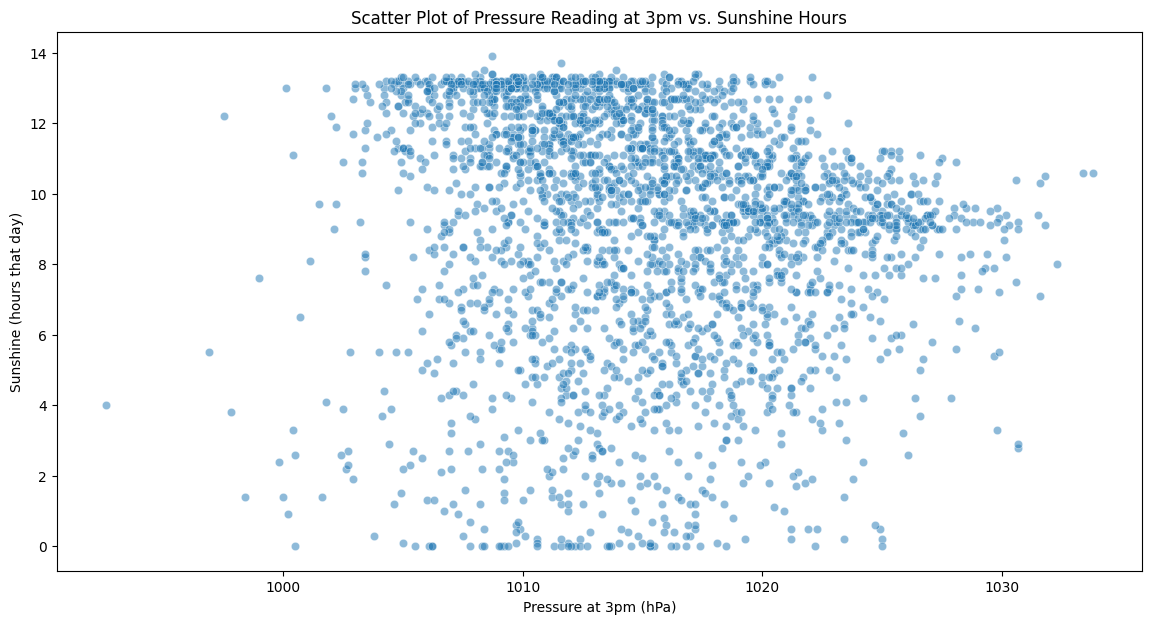

In [147]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['Pressure3pm'], y=df['Sunshine'], alpha=0.5)
plt.title('Scatter Plot of Pressure Reading at 3pm vs. Sunshine Hours')
plt.xlabel('Pressure at 3pm (hPa)')
plt.ylabel('Sunshine (hours that day)')
plt.show()

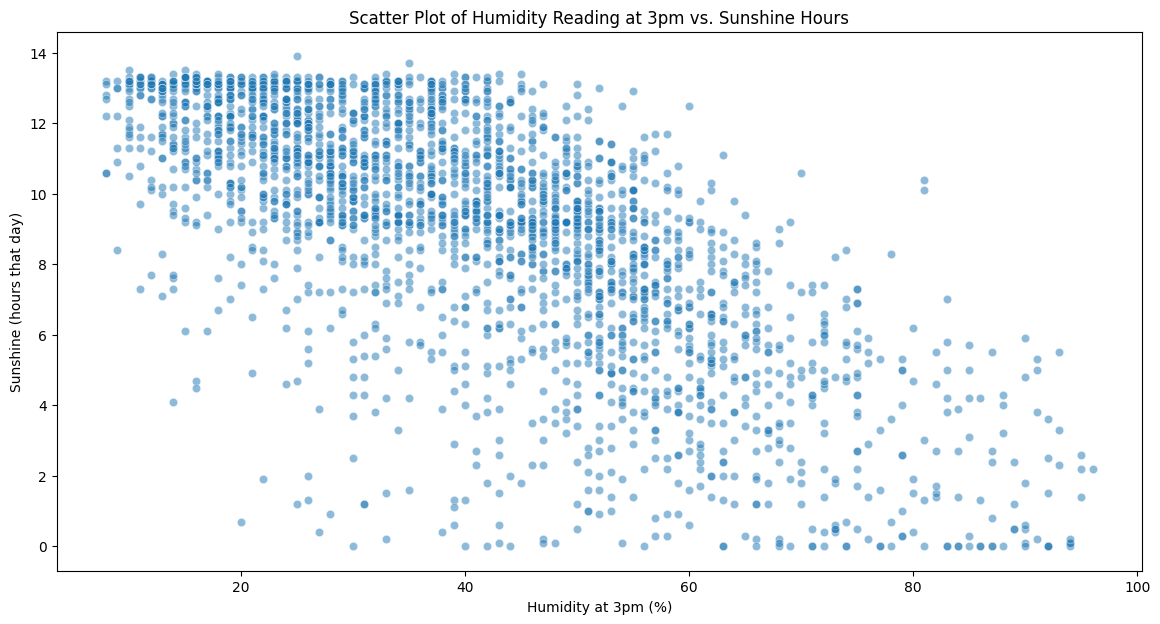

In [148]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['Humidity3pm'], y=df['Sunshine'], alpha=0.5)
plt.title('Scatter Plot of Humidity Reading at 3pm vs. Sunshine Hours')
plt.xlabel('Humidity at 3pm (%)')
plt.ylabel('Sunshine (hours that day)')
plt.show()

There does seem to be a connection here. When the pressure and humidity are at their highest ranges, there is a drop off in the number of sunshine hours that day. This is more pronounced for humidity than pressure.

##### 3b3. Is there a time of year associated with rainy days?

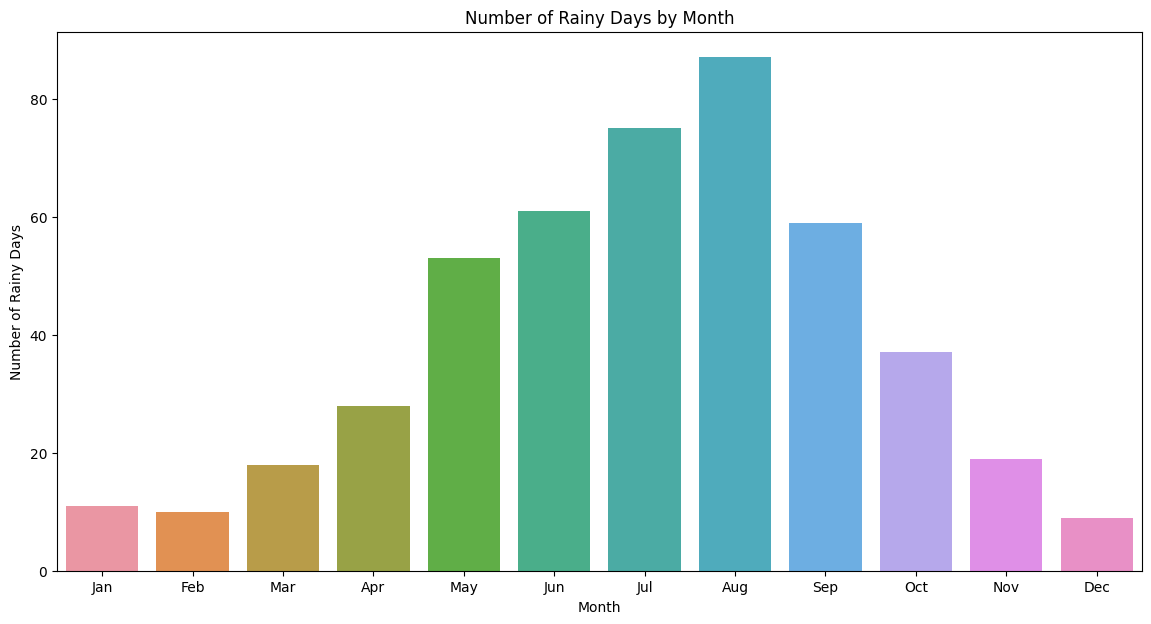

In [149]:
temp_df = df.copy()
temp_df['Month'] = pd.to_datetime(temp_df['Date']).dt.month

monthly_rain = temp_df[temp_df['RainToday'] == 1].groupby('Month').size()

plt.figure(figsize=(14, 7))
sns.barplot(x=monthly_rain.index, y=monthly_rain.values)
plt.title('Number of Rainy Days by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rainy Days')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

It does appear that August (winter time) is the rainy season for RAAF Base Pearce. Perhaps now I should assume that the time of year will be the strongest predictor of "will it rain tomorrow" for any given day.

## 4. Additional Analysis

##### 4a. Professor ChatGPT Explains UMAP
To help me quickly get an understanding on a new tool (UMAP) and how to use it, I now turn to ChatGPT-4 for help understanding what UMAP is and how I can use it on my data to conduct dimensionality reduction. It is important to point out that ChatGPT alone cannot tell me the full (or even accurate) picture of UMAP, and I also went to the UMAP's GitHub site to learn more.
 - **Note:** I take full responsibility for my use of generative AI on this section of the assignment and understand that I may receive 0 points due to my use of this technology

###### Sources:
Please see my conversation with ChatGPT-4 about UMAP here: [OpenAI's ChatGPT-4; accessed on 13 September 2023](https://chat.openai.com/share/40490c7f-45dd-4572-a38e-56f36ecdacb1)

UMAP's GitHub (used for reference): [UMAP GitHub](https://github.com/lmcinnes/umap)

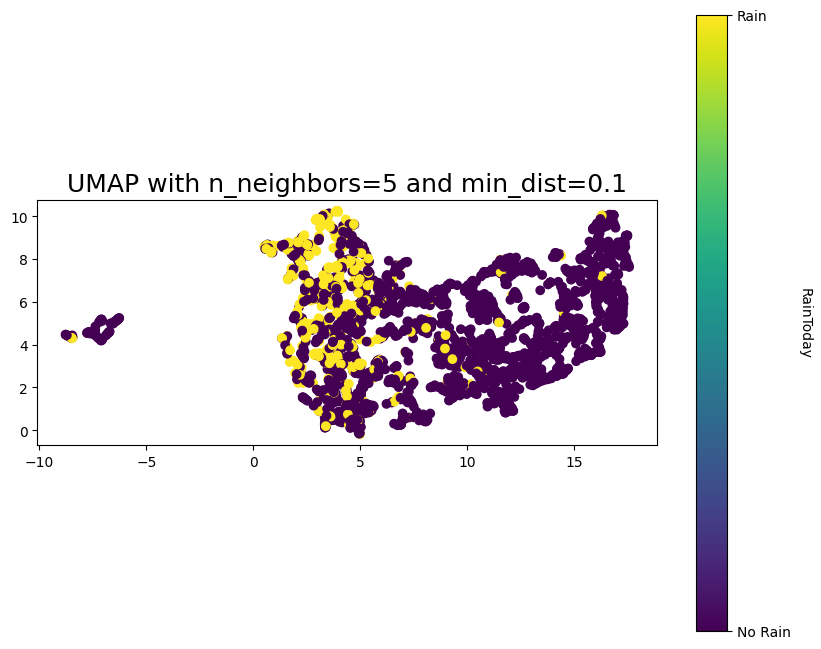

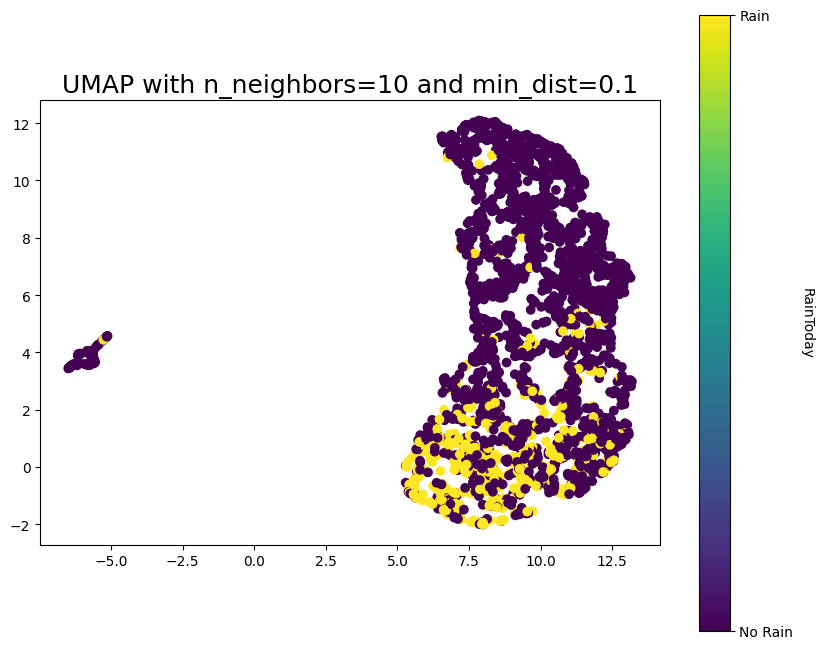

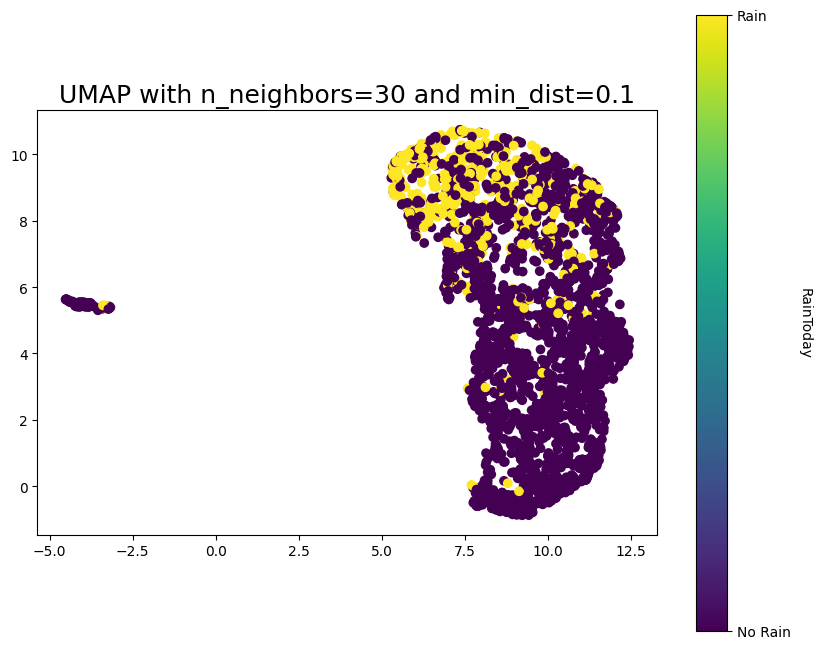

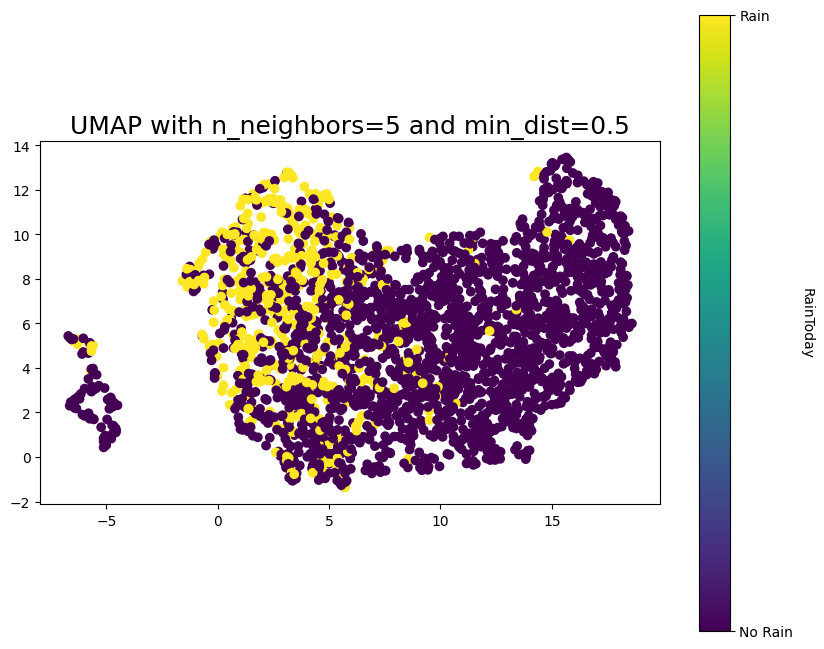

In [150]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataframe 'df'

# Separate features and labels
X = df.drop(['Date', 'RainTomorrow'], axis=1)
y = df['RainToday']

# Define a function to visualize UMAP embeddings
def plot_umap(data, labels, n_neighbors, min_dist, title):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    embedding = reducer.fit_transform(data)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
    cbar = plt.colorbar(scatter, ticks=[0, 1])
    cbar.set_label('RainToday', rotation=270, labelpad=15)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['No Rain', 'Rain'])
    plt.gca().set_aspect('equal', 'box')
    plt.title(title, fontsize=18)
    plt.show()

# Set UMAP parameter combinations and visualize
params = [(5, 0.1), (10, 0.1), (30, 0.1), (5, 0.5)]
for n, d in params:
    title = f'UMAP with n_neighbors={n} and min_dist={d}'
    plot_umap(X, y, n, d, title)

At this point I can see that for each of the four UMAP visualizations (each using a different n_neighbors/min_dist combination) there is a major cluster and a very small minor cluster.

At first I assumed the major cluster was for non-rain days (82% of my data) and the minor cluster was for rainy days (18%), but I quickly realized this not to be the case.

The yellow dots represent rainy days, and are mostly grouped together in one-third or one-half of each major cluster. The minor clusters all consist mostly of non-rainy days.

My only insight from this is that there may be outliers showing up as the minor cluster, but that the very existence of minor clusters at all may be a good starting point to investigating what has predictive power in the data.

##### End of Report
Thank you for reading all the way to the end!